# Data Analysis

## Import modules and data <a class="anchor" id="import-modules"></a>

In [1188]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from IPython.display import display, Markdown
import seaborn as sns
import numpy as np
%matplotlib inline

In [1365]:
# ignore future warnings of sikit-learn
import warnings
warnings.filterwarnings('ignore')

# imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

%matplotlib inline

In [1190]:
sns.set_palette('tab10')

In [1191]:
data = pd.read_csv('Demographic_Data.csv')

## Preprocessing data <a class="anchor" id="preprocesssing"></a>

In preprocessing part data will be cleaned and decribed. Missing values and duplicates will be handled simply by dropping them.

In [1192]:
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


Meaning of values in certain columns:

Column in-storage:
* 1: in-store purchases
* 0: online purchases

In column region
- 1: North
- 2: South
- 3: East
- 4: West

In [1193]:
# describe data
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [1194]:
# info about type of columns and amount of records
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [1195]:
# fixing columns types
data = data.rename(columns={'in-store': 'in_store'})
data1 = data.copy()
data1['region'] = data1['region'].astype('category')
data1['in_store'] = data1['in_store'].astype('category')

In [1196]:
# replacing values with categorical variables
data1['region'] = data1['region'].apply(lambda x: str(x).replace('1', 'North').replace('2', 'South').replace('3', 'East').replace('4', 'West'))
data1['in_store'] = data1['in_store'].apply(lambda x: str(x).replace('0', 'online').replace('1', 'store'))

Finall data set, that will be used for plotting is below.

In [1197]:
data1.head()

,in_store,age,items,amount,region
0,online,37,4,281.03,South
1,online,35,2,219.51,South
2,store,45,3,1525.70,West
3,store,46,3,715.25,East
4,store,33,4,1937.50,North


In [1198]:
#The output is below. This is code cell that displays markdown with current size of data
display(Markdown(r'Number of clients aged 10-100 years is {}. So age data should be correct and next step in data mining is possible.'.format(len(data[data['age'].between(10, 100)]))))
display(Markdown(r'Nuber of purchases in store {} and online {}, which sums up to 80000.'.format(len(data[data['in_store']==True]), len(data[data['in_store']==False]))))

Number of clients aged 10-100 years is 80000. So age data should be correct and next step in data mining is possible.

Nuber of purchases in store 40000 and online 40000, which sums up to 80000.

### Data cleaning <a class="anchor" id="data-cleaning"></a>

In [1199]:
# drop duplicates
data = data.drop_duplicates()
data1 = data1.drop_duplicates()

In [1200]:
display(Markdown(r'Afrter dropping duplicates data has {} records, so {} have been dropped.'.format(len(data), 80000-len(data))))

Afrter dropping duplicates data has 79979 records, so 21 have been dropped.

It is important to consider different methods of dealing with duplicates. Here clients do not have unique ID or at least name so it is impossible to tell if the duplicate is the person same age buying same items or a system error. As there are only 21 out of 80000 duplicates, deleting them does not change the final outcome that much.

In [1201]:
# check missing values
print(data.isnull().sum())

in_store    0
age         0
items       0
amount      0
region      0
dtype: int64


There are none missing values, so I can procced.

Both data sets (data, data1) will be used. Data1 is more convinient for plots of relationships and data will be used in correlation and covariance part.

In [1202]:
# chcek type of variables
print(data.dtypes)
print(data1.dtypes)

in_store      int64
age           int64
items         int64
amount      float64
region        int64
dtype: object
in_store    category
age            int64
items          int64
amount       float64
region      category
dtype: object


Data given in columns age, items and amount is numeric.
Below decription for data without duplicates and missing value.

In [1203]:
print(data1.describe())

                age         items        amount
count  79979.000000  79979.000000  79979.000000
mean      45.758512      4.505133    835.825727
std       15.715158      2.061250    721.263650
min       18.000000      1.000000      5.004700
25%       33.000000      3.000000    285.120000
50%       45.000000      4.000000    582.140000
75%       56.000000      6.000000   1233.400000
max       85.000000      8.000000   3000.000000


## Exploratory Data Analysis <a class="anchor" id="EDA"></a>

Statistics for each variable was already presented in pre-processing part

### Vizualization for each variable

Firstly general plots for variables in the whole country will be presented below.

Text(0.5, 1.0, 'Number of items in all regions')

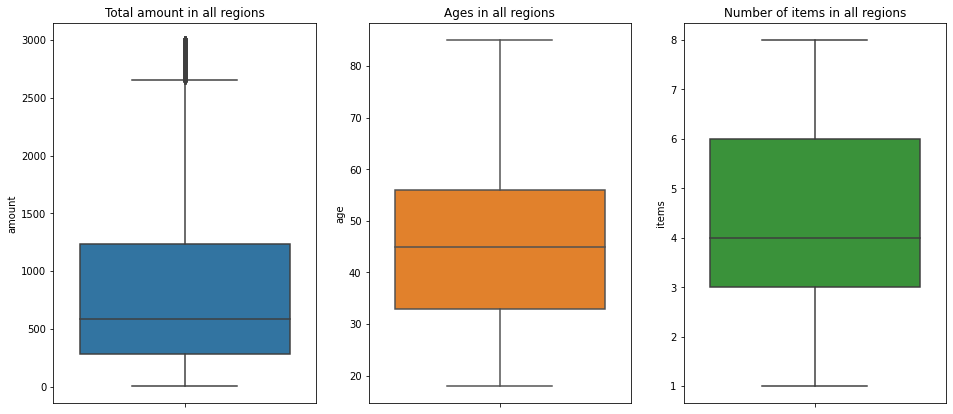

In [1204]:
fig, axs = plt.subplots(1, 3, figsize=(16,7))
sns.boxplot(ax=axs[0], y='amount', data=data1).set_title('Total amount in all regions')
sns.boxplot(ax=axs[1], y='age', data=data1, color='#ff7f0e').set_title('Ages in all regions')
sns.boxplot(ax=axs[2], y='items', data=data1, color='#2ca02c').set_title('Number of items in all regions')

NUmber of transactions per region is also part of a vallid acknowledgement.

region
North    15997
South    19994
East     18000
West     25988
Name: region, dtype: int64


Text(0.5, 1.0, 'Transactions per region')

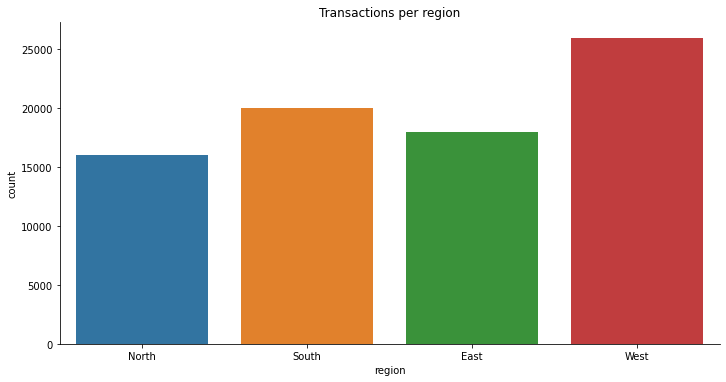

In [1205]:
print(data1.groupby('region')['region'].count())
sns.catplot(x='region', data=data1, kind='count', aspect=2)
plt.title('Transactions per region')

Number of transactions per regions fluctuates between 16K in the North and 26K in the West.

In [1206]:
data1.groupby('region').mean()

,age,items,amount
region,,,
North,43.704132,4.510283,744.990939
South,56.609083,4.512804,252.097741
East,45.646944,4.494000,917.969637
West,38.752424,4.503771,1283.938357


In the table there are means of age, items and amount in different regions. What is interesting is that the __average basket size is similar in every region, but the gap between amounts of money spend is collosal.__ People in the South paid 252, meanwhile in the West 1284. Another thing is that __in the West average client is almost 20 years younger(38yo) than in South(56yo)__.

Next step is to visualize variables separated by regions.

Text(0.5, 1.0, 'Total amount per region')

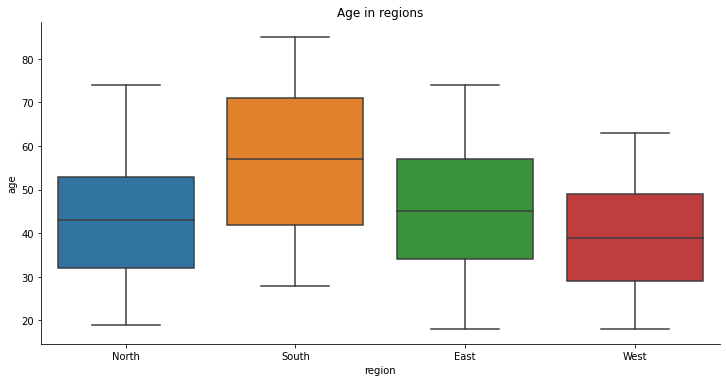

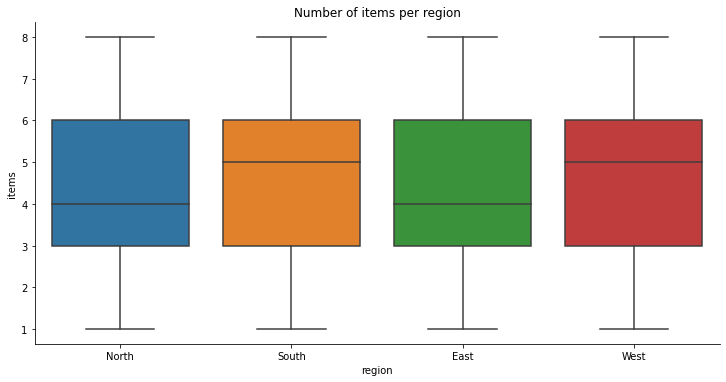

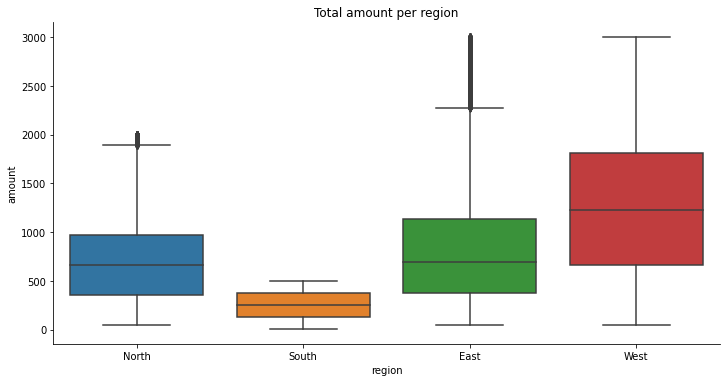

In [1207]:
sns.catplot(x='region', y='age',data=data1, kind='box', aspect=2)
plt.title('Age in regions')
sns.catplot(x='region', y='items',data=data1, kind='box', aspect=2)
plt.title('Number of items per region')
sns.catplot(x='region', y='amount',data=data1, kind='box', aspect=2)
plt.title('Total amount per region')

__Age__

In the South average client is the oldest (56yo), while in the West avg client is the youngest(38yo).

__Items__

Mean basket size is similar in every region - it totals 4 or 5.

__Amount__

There is a big difference between means and IQRs in regions. The exact values are in the table above. In the North and the East there are outliers from normal distribution.

### Detecting outliers

Considering outliers shown on boxplot in amount variable let's look into Z- score values.

In [1208]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
# boxplot shows outliers on right side so z>3
data.iloc[np.where(z > 3)[0]]

,in_store,age,items,amount,region
16478,0,19,7,3000.0,3
60261,0,33,8,3000.0,4
61166,0,41,5,2999.8,3
61744,0,60,3,2999.7,4


Taking into account that there are none outliers on the left and outliers of variable amount from the right side have rather big amount of items (exept  No.61744 which has only 3 items) I will not cut them out of analysis as they are rather possible to occur. To conclude: data is rigtly skewed and those aren't outliers.

### Age

This part will bo concentrated in age variable and it's relationships with other values. First plot is simple histogram of age in the data set.

Text(0.5, 1.0, "Distribution of clients' ages")

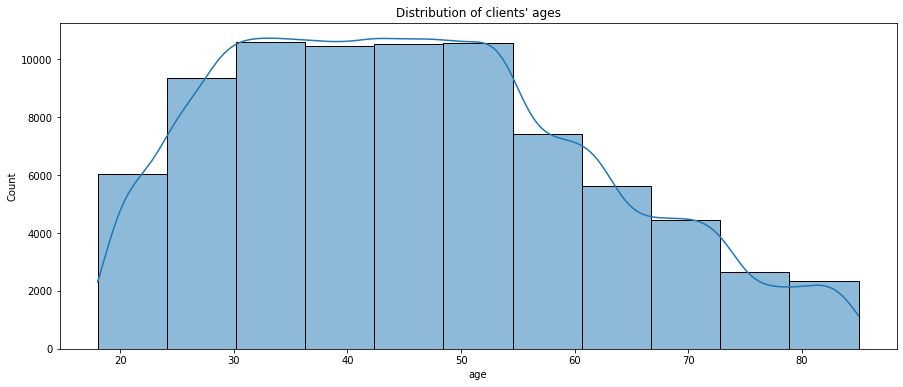

In [1209]:
plt.figure(figsize=(15,6))
age_histplot = sns.histplot(data['age'], bins=11, kde=True)
age_histplot.set_title("Distribution of clients' ages")

Mean age per region is also various. THe oldest are customers in the South.

(0.0, 85.0)

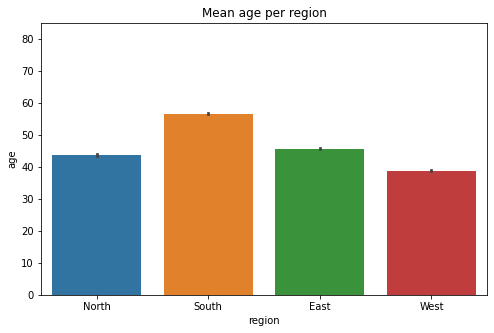

In [1210]:
plt.figure(figsize=(8,5))
sns.barplot(x='region', y='age', data=data1).set_title('Mean age per region')
plt.ylim(0, data1['age'].max())

In [1211]:
data1.groupby(['region', 'in_store']).mean()['age']

region  in_store
North   online            NaN
        store       43.704132
South   online      56.609083
        store             NaN
East    online      40.480360
        store       48.935540
West    online      40.523857
        store       36.980991
Name: age, dtype: float64

Groupping by region and place of purchase observation is that mostly older customers buy in the South online, and youngest in the West in store.

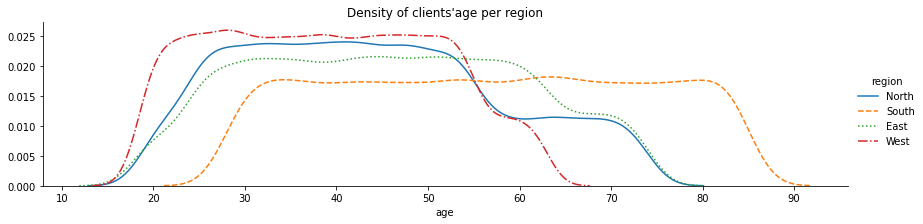

In [1212]:
linestyle_dic = {'ls': ['-', '--', ':', '-.', '-', '--']}
fig = sns.FacetGrid(data1, hue='region', aspect=4, hue_kws=linestyle_dic)
fig.map(sns.kdeplot, 'age')
plt.title("Density of clients'age per region")
fig.add_legend()

In the West customers are mostly younger people under 55yo.They buy the the most.

In the East people between 55 and  75 are more active buyers than in the West.

In the North distribution is similar to the East one, but there are a few less customers ca. 60yo.

In the South the sales are the worst, but they are constant in all ages untill 85.

Then plot comparing place of purchase and age.

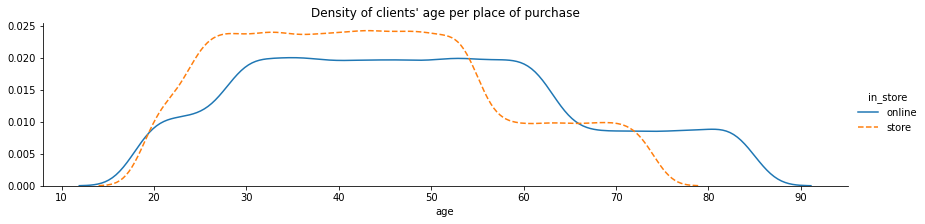

In [1213]:
fig = sns.FacetGrid(data1, hue='in_store', aspect=4, hue_kws=linestyle_dic)
fig.map(sns.kdeplot, 'age')
plt.title("Density of clients' age per place of purchase")
fig.add_legend()

It is intriguing, that young people (20-50yo) tend to buy items in brick and mortar shop and the elderly do more shopping online.

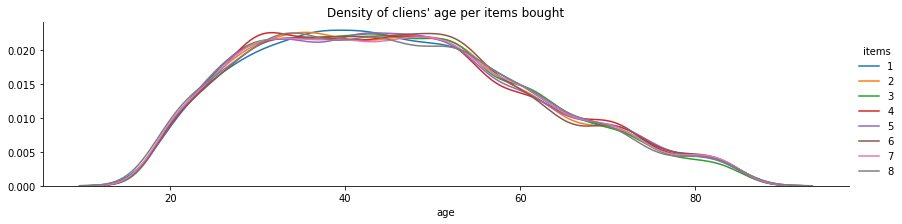

In [1214]:
fig = sns.FacetGrid(data1, hue='items', aspect=4)
fig.map(sns.kdeplot, 'age')
plt.title("Density of cliens' age per items bought")
fig.add_legend()

Distibutions of number of items bought depending on age is similar to all basket sizes.

In [1215]:
# Checking patterns in different generations
# function to assign to generations
def generation(age):
    if age <= 24:
        return 'Gen Z'
    elif 24 < age <= 40:
        return 'Millennials'
    elif 40 < age <= 56:
        return 'Gen X'
    elif 56 < age <= 66:
        return 'Boomers II'
    elif 66 < age <= 75:
        return 'Boomers I'
    elif 75 < age:
        return 'Post War'

In [1216]:
data1['generation'] = data1['age'].apply(generation)

In [1217]:
data1.groupby('generation')['generation'].count()

generation
Boomers I       6034
Boomers II     10378
Gen X          27265
Gen Z           6040
Millennials    26845
Post War        3417
Name: generation, dtype: int64

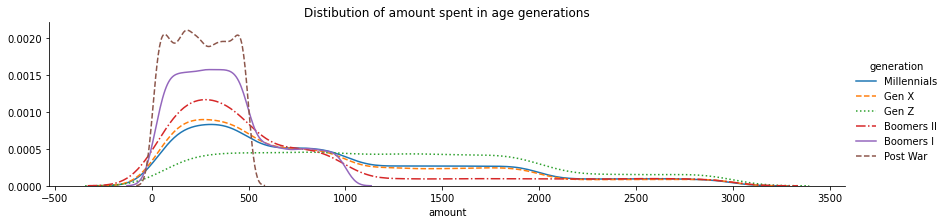

In [1218]:
fig = sns.FacetGrid(data1, hue='generation', aspect=4, hue_kws=linestyle_dic)
fig.map(sns.kdeplot, 'amount')
plt.title('Distibution of amount spent in age generations')
fig.add_legend()

Gen Z prefers generates more ransactions on bigger amounts. They acually buy things more expensive than 1 000 the most of all generation.

Millenials make more transactions than Gen Z on amounts 0-500\$, but less in amounts bigger than 1 000.

Gen X is very similar to Millenials in case of size of transactions.

Boomers II do more transactions than Gen X, but less than Boomers I. They also prefer spending less than 1000.

Boomers I do not buy for more than 1 000, but they do a lot of smaller transactions on 0-500.

Post War spend little amounts of money on transactions. They are the biggest customer under 500.

In [1219]:
data1.groupby(['generation', 'in_store'])['generation'].count()

generation   in_store
Boomers I    online       3084
             store        2950
Boomers II   online       6439
             store        3939
Gen X        online      12657
             store       14608
Gen Z        online       2826
             store        3214
Millennials  online      11566
             store       15279
Post War     online       3417
             store           0
Name: generation, dtype: int64

Plot of number of transactions per generation with division on regions and place of purchase

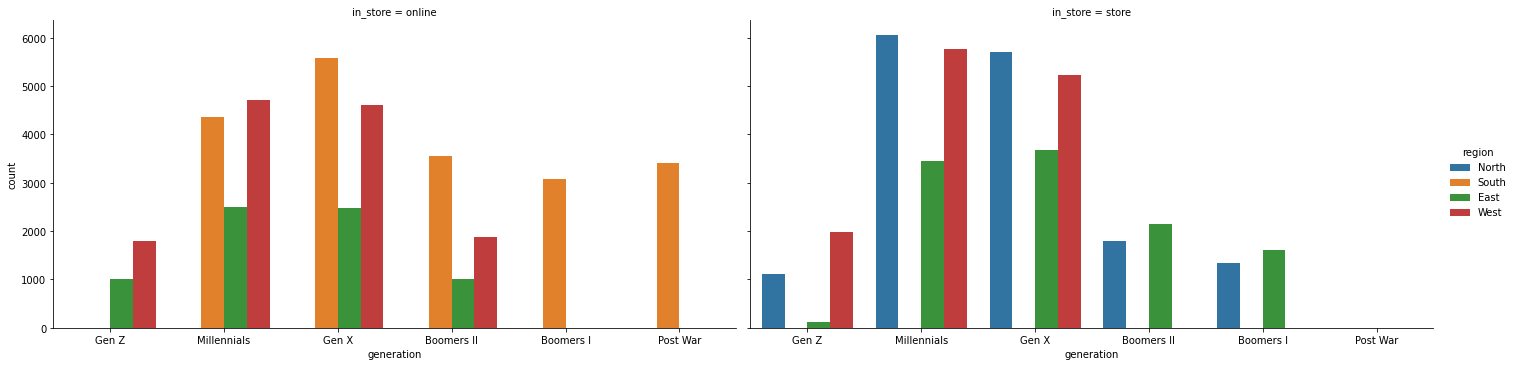

In [1220]:
order_list = ['Gen Z', 'Millennials', 'Gen X', 'Boomers II', 'Boomers I', 'Post War']
sns.catplot(x='generation', data=data1, hue='region' ,kind='count', col='in_store', order=order_list, aspect=2)

Insights:

In the South a big group of customers is Post War generation and Boomers I, who buy online.

In the West only people under 56yo do shopping in store.

Millenials are the most active in North and West in stationary stores.



### Amount

Next step is to discover relationships between amount and other variables.

Text(0.5, 1.0, 'Total amount spend')

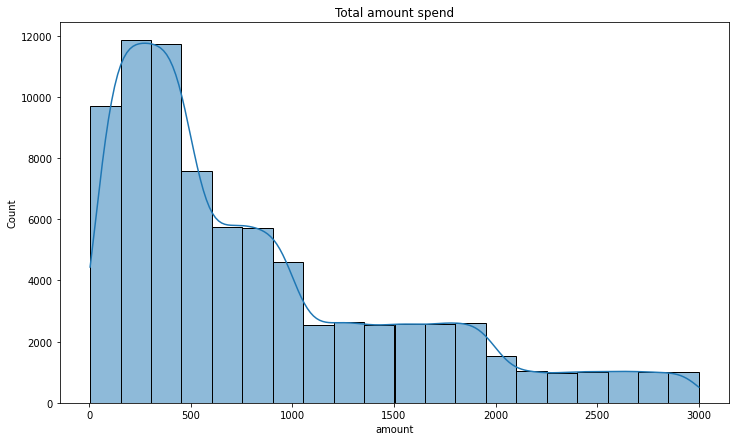

In [1221]:
plt.figure(figsize=(12, 7))
sns.histplot(data['amount'], bins=20, kde=True).set_title('Total amount spend')

region
North     744.990939
South     252.097741
East      917.969637
West     1283.938357
Name: amount, dtype: float64


Text(0.5, 1.0, 'Means of amounts per region')

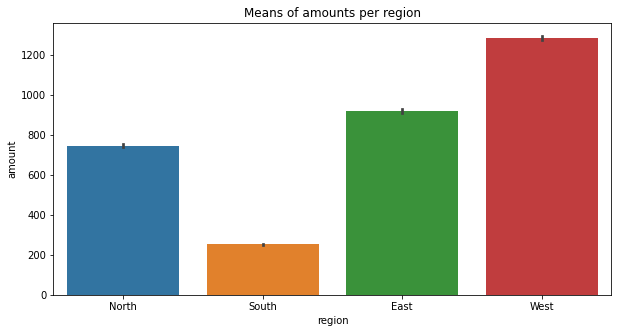

In [1222]:
print(data1.groupby('region')['amount'].mean())
figure = plt.figure(figsize=(10, 5))
sns.barplot(x='region', y='amount', data=data1).set_title('Means of amounts per region')

There is no change of order of the biggest amount regarding sum and mean amount in different regions.

### Items

Following paragraph concerns variable items and it's impact on buying patterns.

items
1     5699
2    11284
3    11486
4    11594
5    11233
6    11519
7    11376
8     5788
Name: items, dtype: int64


Text(0.5, 1.0, 'Number of transactions for number of items')

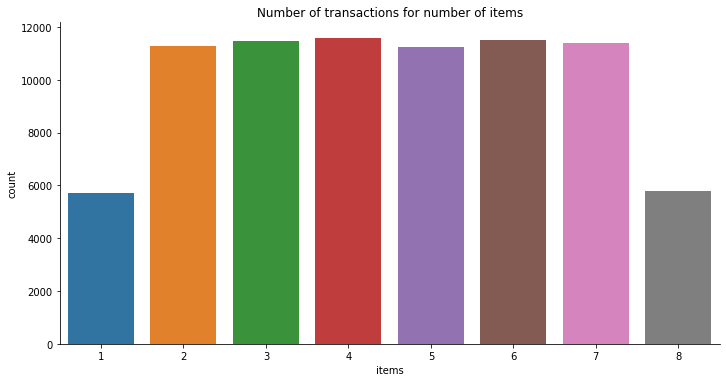

In [1223]:
print(data1.groupby('items')['items'].count())
sns.catplot(x='items', data=data1, kind='count', aspect=2)
plt.title('Number of transactions for number of items')

All basket sizes occur similar number of times in the data except from 1 and 8, whih both are half as numerous as 2-7 items.

Text(0.5, 1.0, 'Amount on number of items')

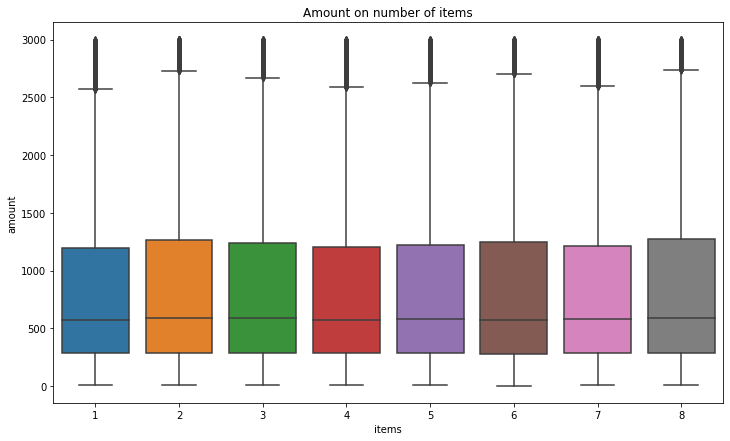

In [1224]:
plt.figure(figsize=(12,7))
sns.boxplot(y='amount', x='items' ,data=data1).set_title('Amount on number of items')

Results in the table and on the plot above give that average amount spend on transaction does not depend on basket size.

Boxplots of amount(items) look very similar to each other.

Text(0.5, 1.0, 'Estimate central tendency')

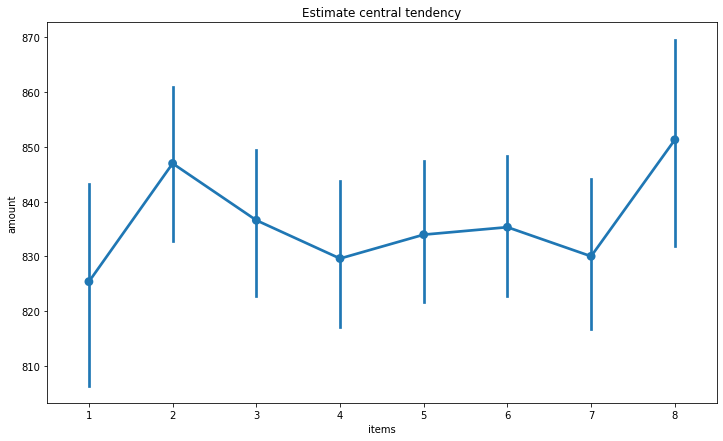

In [1225]:
plt.figure(figsize=(12,7))
sns.pointplot(x="items", y="amount", data=data1).set_title('Estimate central tendency')

From the three plots given and the values in table the relation between those two categories (items and amount) seems to be none.

In [1226]:
pd.pivot_table(data1, index='region', columns='items', values='amount')

items,1,2,3,4,5,6,7,8
region,,,,,,,,
North,751.450329,766.924871,743.810869,727.300536,745.737906,740.033224,737.791975,757.540969
South,257.587746,250.012124,252.182018,249.626762,252.399170,254.961019,251.735042,249.882689
East,894.239667,931.767999,916.421853,935.009959,911.578511,903.035816,910.417209,937.914856
West,1255.778428,1297.199268,1272.761661,1280.247027,1277.747343,1296.386021,1280.238420,1310.646915


The pivot table once again presents, that there is no relationship between items and amount categories. But there is relationship between amount and region.

### Place of purchase

Last variable which is place of purchase, will be visualized below.

in_store
online    39989
store     39990
Name: in_store, dtype: int64


Text(0.5, 1.0, 'Place of purchase')

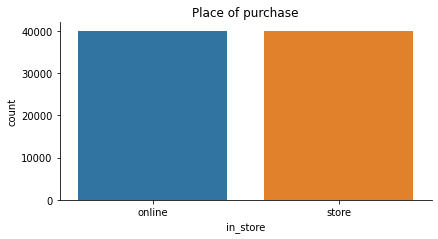

In [1227]:
print(data1.groupby('in_store')['in_store'].count())
sns.catplot(x='in_store', data=data1, kind='count', aspect=2, height=3)
plt.title('Place of purchase')

region  in_store
North   online          0
        store       15997
South   online      19994
        store           0
East    online       7001
        store       10999
West    online      12994
        store       12994
Name: region, dtype: int64


Text(0.5, 1.0, 'Comparison of place of purchase in regions')

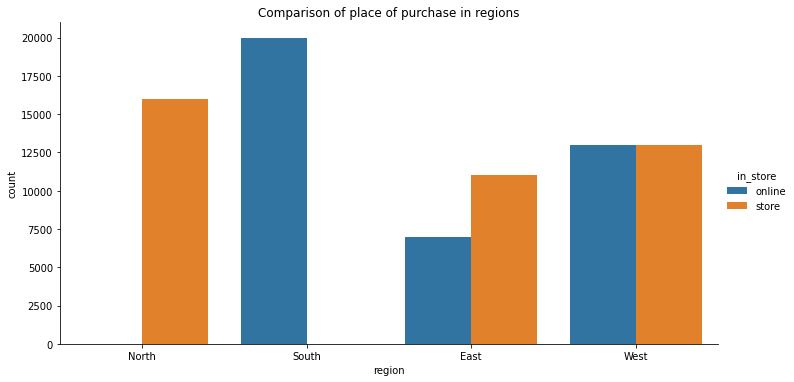

In [1228]:
print(data1.groupby(['region', 'in_store'])['region'].count())
sns.catplot(x='region', data=data1, hue='in_store', kind='count', aspect=2)
plt.title('Comparison of place of purchase in regions')

Nobody in the North buys in the internet. In the store there were 16 000 transactions.

nobody in the South buys in the stationary shop. There were almost 20 000 online transactions.

The West is in perfect balance with the store--online ratio (13 000 & 13 000).

In the East more people buy in store 11 000 vs online 7 000.

Even though South has more transactions than Notrh it is less lucrative. Poeple in South are elder than in other regions and tend to pay less than 500 per transaction.

in_store  items
online    1        2840
          2        5679
          3        5687
          4        5774
          5        5565
          6        5721
          7        5813
          8        2910
store     1        2859
          2        5605
          3        5799
          4        5820
          5        5668
          6        5798
          7        5563
          8        2878
Name: region, dtype: int64


Text(0.5, 1.0, 'Place of purchase depending of number of items')

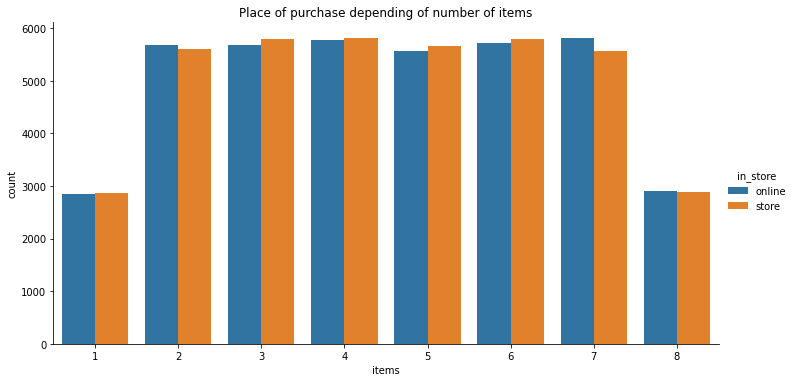

In [1229]:
print(data1.groupby(['in_store', 'items'])['region'].count())
sns.catplot(x='items', data=data1, hue='in_store' ,kind='count', aspect=2)
plt.title('Place of purchase depending of number of items')

Inspecting place of purchase of certain basket sizes the numbers of online--store are similar.

in_store  region
online    North         0
          South     19994
          East       7001
          West      12994
store     North     15997
          South         0
          East      10999
          West      12994
Name: in_store, dtype: int64


Text(0.5, 1.0, 'Comparison of place of purchase in regions')

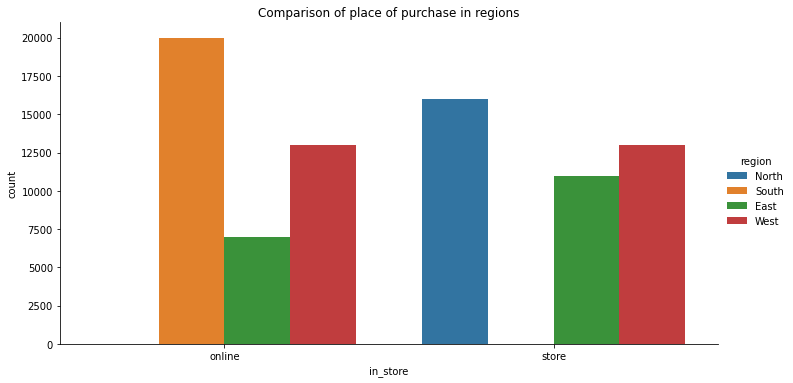

In [1230]:
print(data1.groupby(['in_store', 'region'])['in_store'].count())
sns.catplot(x='in_store', data=data1, hue='region', kind='count', aspect=2)
plt.title('Comparison of place of purchase in regions')

On the above plot it is a good sign that places with only one method of buying are more numerous in their online-in_store kind.

### Scatterplots of 3 variables

Text(0.5, 1.0, 'Amount spent in transactions')

<Figure size 1080x720 with 0 Axes>

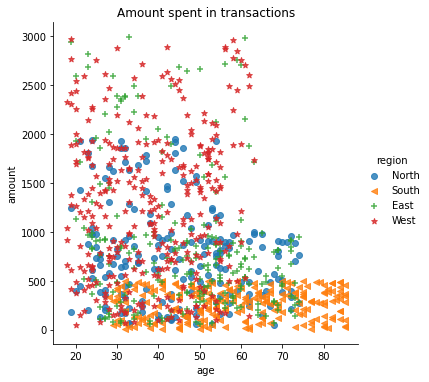

In [1231]:
plt.figure(figsize=(15,10))
markers=['o', '<', '+', '*', '^', '*', '<']
sns.lmplot(x='age', y='amount', data=data1.sample(1000), hue='region', markers=markers[:4], fit_reg=False)
plt.title('Amount spent in transactions')

Plot above shows that in the East and the West regions clients have done shopping on bigger amounts. In the South people tend to make smaller shopping, but it is only region that elderly people make as much shopping as younger people.

Text(0.5, 1.0, 'Place of purchase based on age and amount')

<Figure size 1080x720 with 0 Axes>

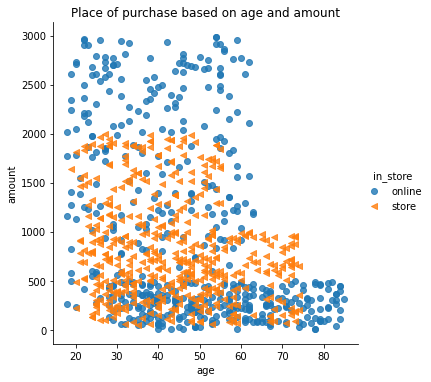

In [1232]:
plt.figure(figsize=(15,10))
sns.lmplot(x='age', y='amount', data=data1.sample(1000), hue='in_store', markers=markers[:2], fit_reg=False)
plt.title('Place of purchase based on age and amount')

People tend to make bigger shopping (over 2 000) online. Also elderly (70+) prefer to shop online.

### Jitter plot

The amount of data is big, so taking sample of 10000 records (1/8 of data) is representative.

Text(0.5, 1.0, 'Amount of purchase of items')

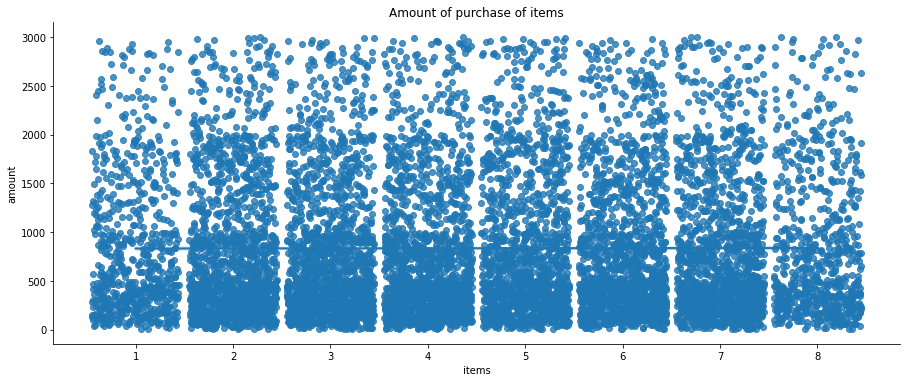

In [1233]:
sns.lmplot(x='items', y='amount', data=data1.sample(10000),  fit_reg=True, x_jitter=0.45, aspect=2.5)
plt.title('Amount of purchase of items')

Jittered plot shows that the values are concentrated in lower part on plot (0-1000 money).

The regression line in this case is almost steady and the value fluctuates around 850.

### Correlation

In [1234]:
data.corr()

,in_store,age,items,amount,region
in_store,1.000000,-0.178180,-0.003897,-0.085573,-0.133171
age,-0.178180,1.000000,0.000657,-0.282033,-0.235370
items,-0.003897,0.000657,1.000000,0.000384,-0.001904
amount,-0.085573,-0.282033,0.000384,1.000000,0.403486
region,-0.133171,-0.235370,-0.001904,0.403486,1.000000


In [1235]:
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))

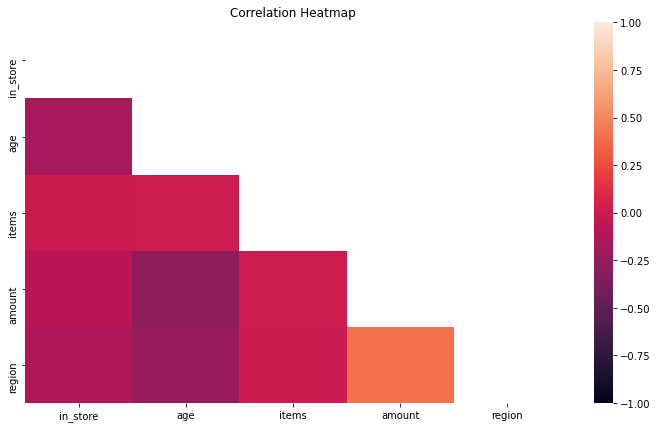

In [1236]:
plt.figure(figsize=(12,7))
corr_heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1)
corr_heatmap.set_title('Correlation Heatmap');

After building your Correlation matrix, what can we ascertain about the relationship between 'age' and 'amount'?

The coefficient is not that small (nearly -0.3) so the categories are correlated. It is negative correlation so if age is increasing the amount is decreasing. It is consistent with what already was shown on plots in Age subsection.

There is also visible correlation between region and amount of 0.4 value and region and age of -0.23 value.

### Covariance

In [1237]:
data.cov()

,in_store,age,items,amount,region
in_store,0.250003,-1.400071,-0.004017,-30.860425,-0.075019
age,-1.400071,246.966189,0.021270,-3196.782841,-4.167305
items,-0.004017,0.021270,4.248751,0.570791,-0.004421
amount,-30.860425,-3196.782841,0.570791,520221.252295,327.874873
region,-0.075019,-4.167305,-0.004421,327.874873,1.269321


Text(0.5, 1.0, 'Covariance Heatmap')

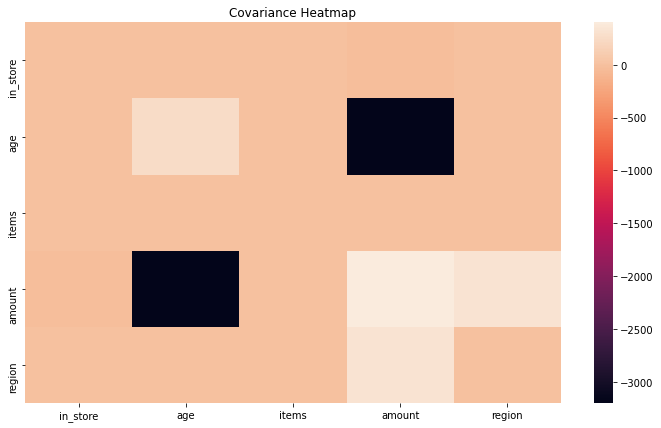

In [1238]:
plt.figure(figsize=(12,7))
cov_heatmap = sns.heatmap(data.cov(), fmt='.1f', vmax=400)
cov_heatmap.set_title('Covariance Heatmap')

After reading about covariance and building your covariance matrix, what can we ascertain about 'region' and 'amount'?

Region and amount is a pair with covariance value over 300. Positie covariance means that the bigger the number of region the bigger the amount.

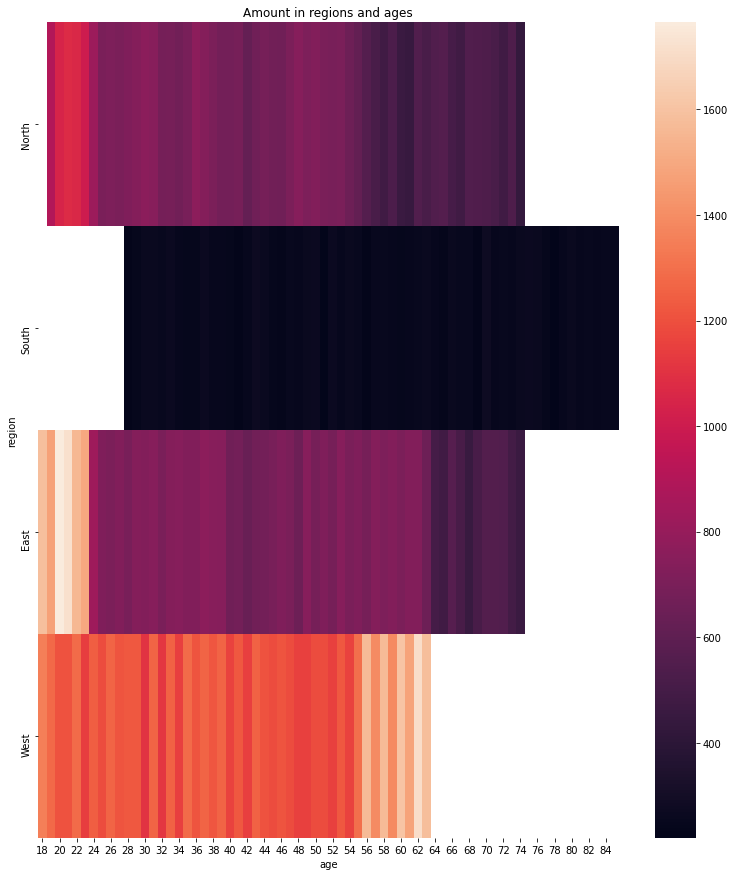

In [1239]:
plt.figure(figsize=(13, 15))
df = data1.pivot_table(index='region', columns='age', values='amount', aggfunc=np.median)
sns.heatmap(df, fmt=".1f").set_title('Amount in regions and ages')
plt.show()

Heatmap visualizes many things that were already mentioned:
1. In the West clients are younger and they leave in the store more money.
2. In the South clientele is older (even 84yo) and it mostly pays under 500.
3. THe East and the West is similar in case of customers, but in the East young people (under 24) make big purchases.

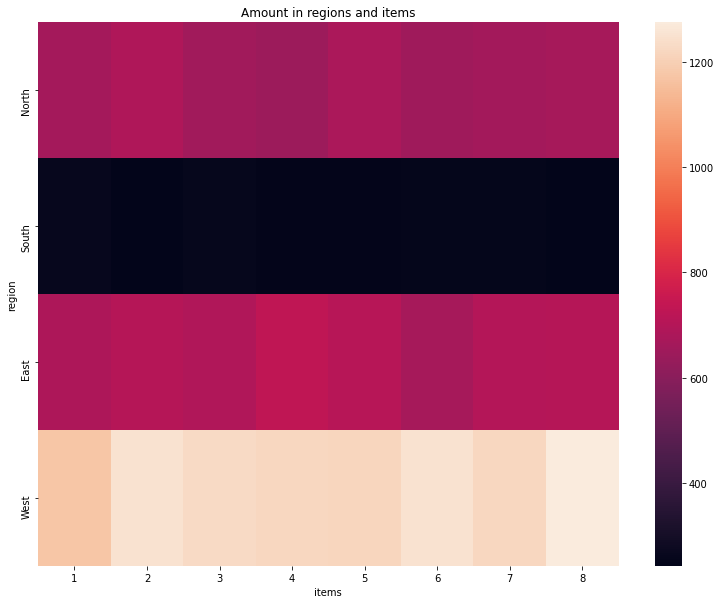

In [1240]:
plt.figure(figsize=(13, 10))
df1 = data1.pivot_table(index='region', columns='items', values='amount', aggfunc=np.median)
sns.heatmap(df1, fmt=".1f").set_title('Amount in regions and items')
plt.show()

The heatmap once again shows us lack of correlatoon between items and amount.

## Conclusions <a class="anchor" id="conclusion"></a>

* Do customers in different regions spend more per transaction? Which regions spend the most/least?

The costumers in distinct regions indeed spend different amounts on transactions. Usually the most spend clients in the West (1284) and the least spend on the South (only 252). In the middle there is the East with (918) and the North (745).

* Is there a relationship between number of items purchased and amount spent?

The mean amount for one transaction does not change much in different number of items. Taking into account correlation, covariance and pointplot it seems those values are not in relationship. 

Variables region, age and amount have the most impact on the data. They are the most correlated ones and plots shown in this notebook in EDA part visualize the relationships between them.

# Task 2

Firstly, preparing needed columns of data to use through task 2.

In [1241]:
#features
# X = data1.iloc[:,0:6]
X = data1.drop(['region'], axis='columns')
#dependent variable
y = data1['region']

In [1242]:
# encoding categories, creating new tables
in_store_n = LabelEncoder()
generation_n = LabelEncoder()
X['in_store_n'] = in_store_n.fit_transform(X['in_store'])
X['generation_n'] = generation_n.fit_transform(X['generation'])
X_generations = X.copy()
X = X.drop(['in_store', 'generation'], axis='columns')

In [1243]:
X_generations.head()

,in_store,age,items,amount,generation,in_store_n,generation_n
0,online,37,4,281.03,Millennials,0,4
1,online,35,2,219.51,Millennials,0,4
2,store,45,3,1525.70,Gen X,1,2
3,store,46,3,715.25,Gen X,1,2
4,store,33,4,1937.50,Millennials,1,4


In [1244]:
X = X.drop(['generation_n'], axis='columns')

## Region prediction

This is first example so every step is shown in detail. Next ones will be more synthetic.
Starting from preliminary tree, going through cross validation and tuning parameters, disrediziting variables to final model.

### Preliminary Classification Tree

The code splits given data into 4 parts. Two of them are used for training purposes and the rest are used in test of model.

In [1245]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

#Modeling
algo = DecisionTreeClassifier()
model = algo.fit(X_train,y_train)

#Predictions
preds = model.predict(X_test)

In [1246]:
# report of crutial statistics
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

        East       0.37      0.37      0.37      4524
       North       0.40      0.40      0.40      4036
       South       0.91      0.90      0.91      4982
        West       0.53      0.53      0.53      6453

    accuracy                           0.56     19995
   macro avg       0.55      0.55      0.55     19995
weighted avg       0.56      0.56      0.56     19995



Preliminary classification tree is big and needs pruning. The bigger the tree implies bigger chance, that model will be overfitted. Overfitting is worse from underfitting, because the model is using to specyfic information where it should be more generall.

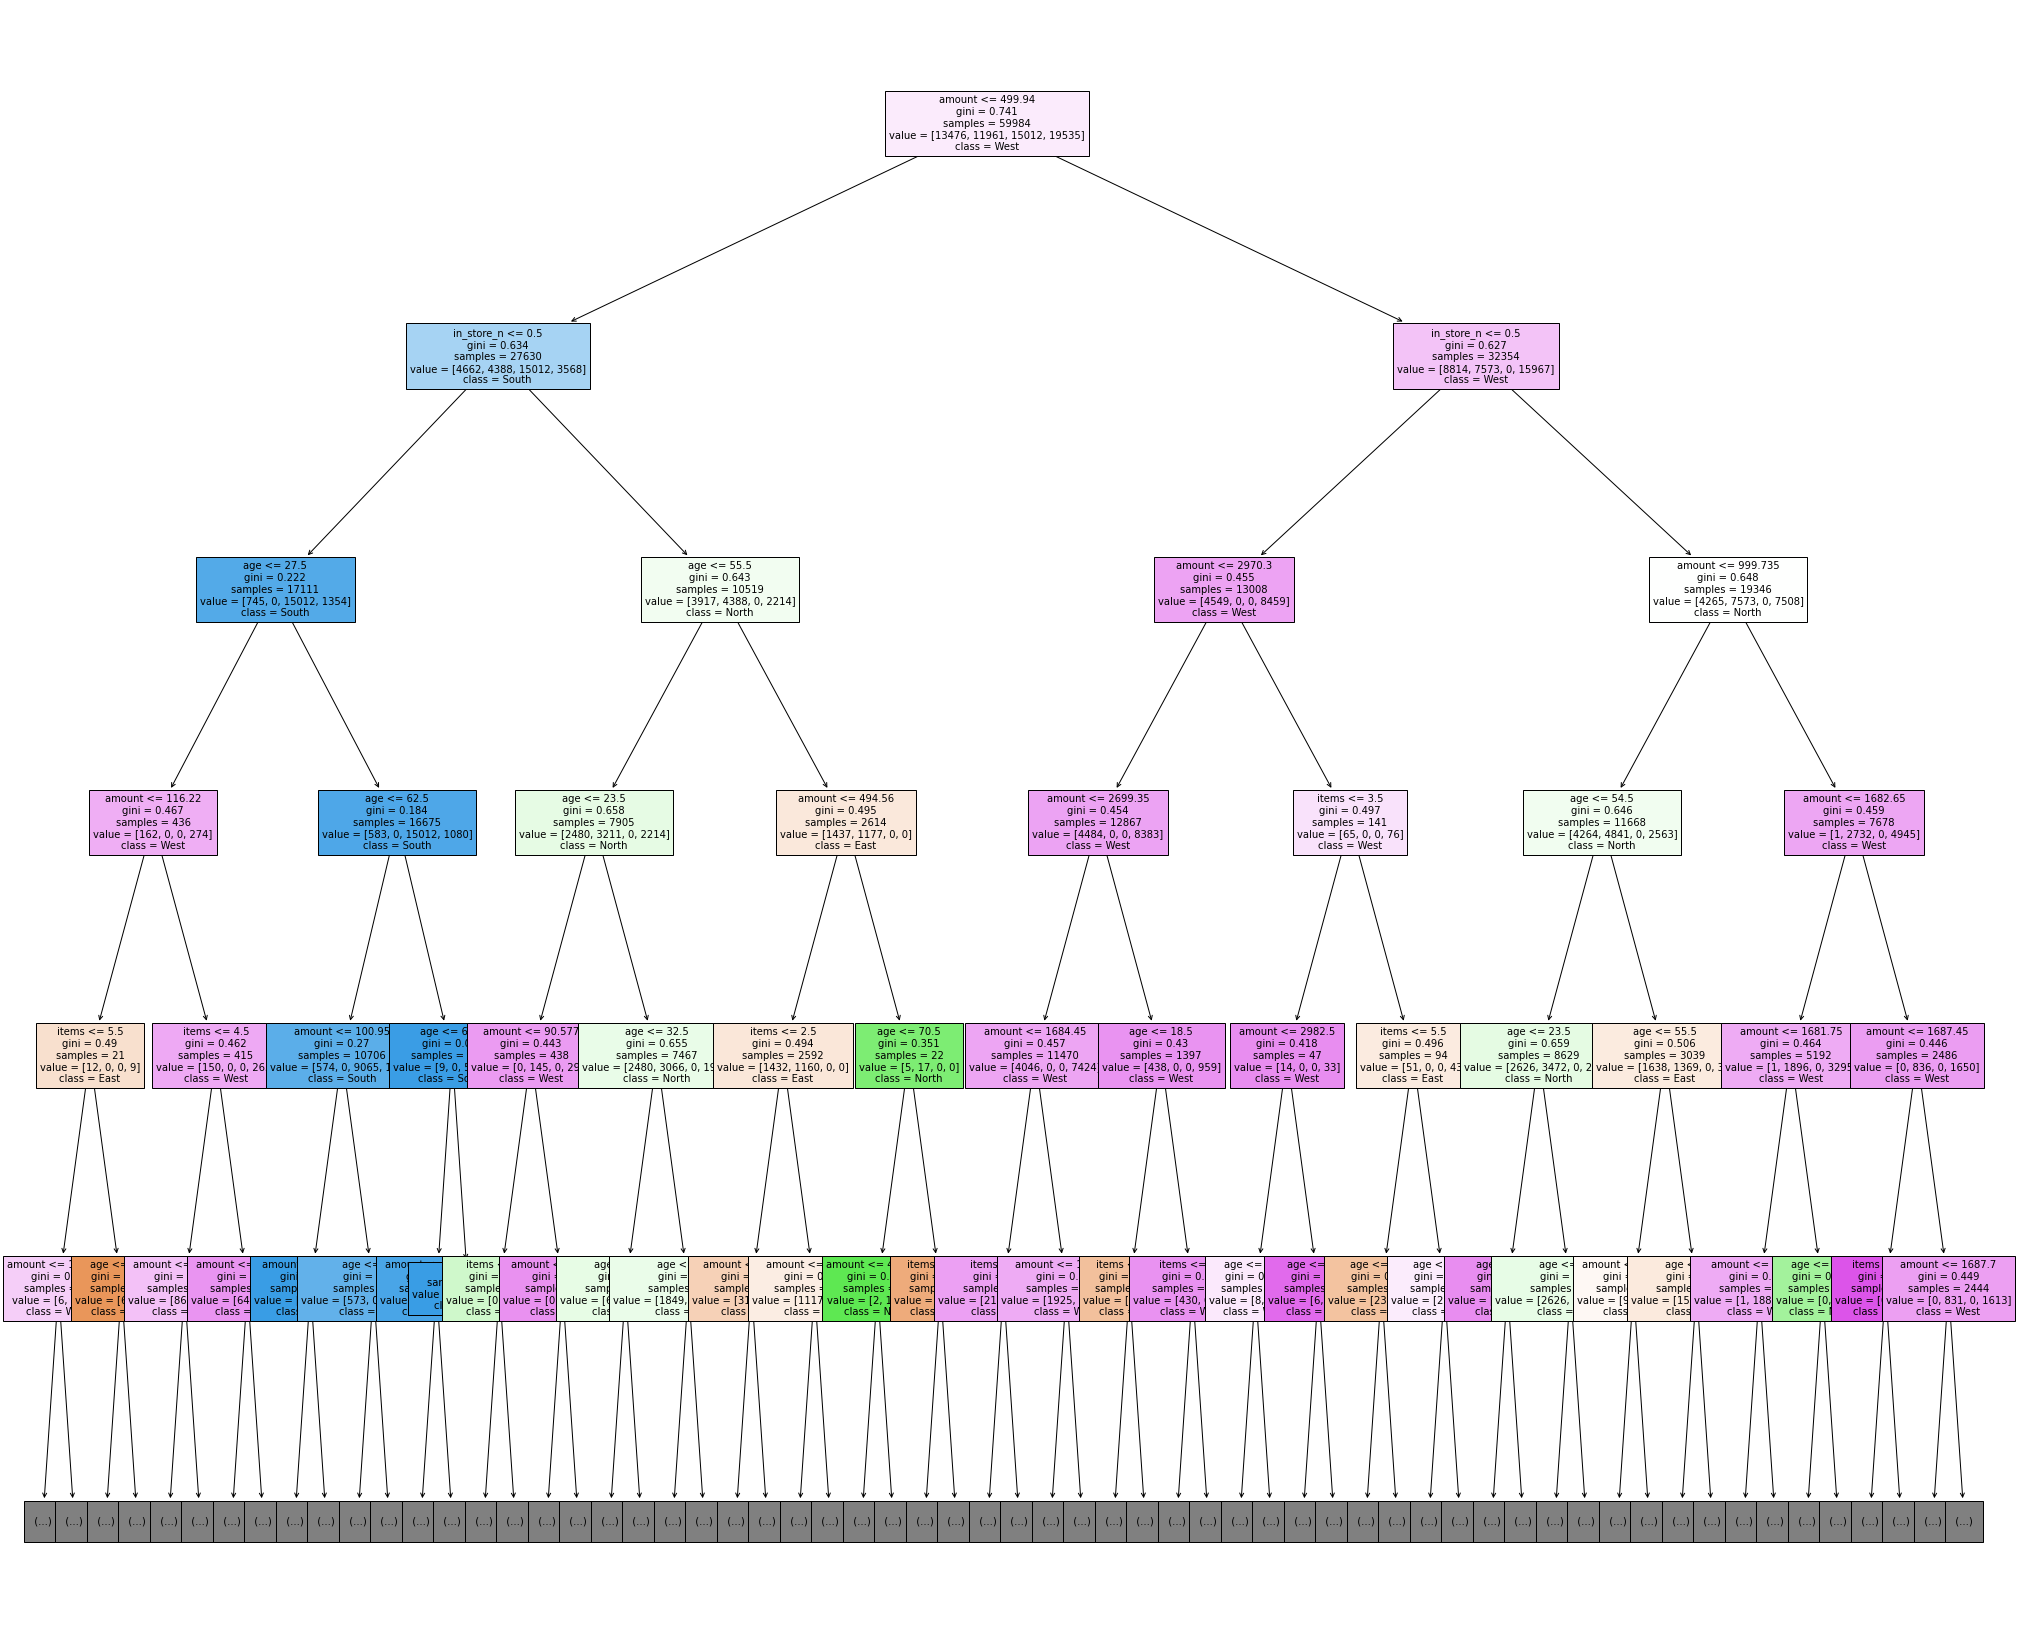

In [1247]:
fig = plt.figure(figsize=(35,30))
tree = plot_tree(model, feature_names=X.columns,class_names=['East', 'North', 'South', 'West'], max_depth=5, filled=True, fontsize=10)

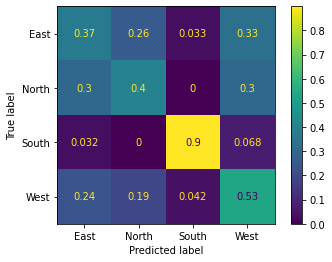

In [1248]:
# plot_confusion_matrix(model, X_test, y_test)
plot_confusion_matrix(model, X_test, y_test, normalize='true')

From the matix above:

South is easy to spot for the algorithm (as it has little amount values probably and only online purchases) 

East on the other hand is hard to identify, because it is very similar to North and West in case of amount.

In [1249]:
# feature importance
pd.Series(model.feature_importances_, index = X.columns)

age           0.163151
items         0.075454
amount        0.562903
in_store_n    0.198491
dtype: float64

The most important ariable for predicting region is amount, as it was visible in EDA there are visible differences. Also valid are in_store and age variables. In_store says a lot, since only 2 regions have both online and in store buying option.

### cross validation

Next step is cross validation, which will be applied to three models.

In [1250]:
# Evaluating 3 models 
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier(max_depth=7)))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier(max_depth=7)))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier(max_depth=7)))

In [1251]:
#classification
results = []
names = []
for name, a_model in algos_Class:
    result = cross_val_score(a_model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [1253]:
# printing results
for i in range(len(names)):
    print(names[i],round(results[i].mean(), 2))

Random Forest Classifier 0.64
Decision Tree Classifier 0.64
Gradient Boosting Classifier 0.63


So Random Forest Classifier preforms the best, but Decision Tree Classifier does almost as good. Gradient Boosting Classifier is the worst in this case, but its mean accuracy is still pretty close to the otrzes classifiers. GradientBoosting takes much more time to execute.

### Tuning parametres

Searching for optimal parameters in Decision trees. Most important is accuracy value, then others like precision and recall.

In [1254]:
#Modeling
algo2 = GradientBoostingClassifier(max_depth=7, min_samples_split=0.01)
model2 = algo2.fit(X_train,y_train)

#Predictions
preds2 = model2.predict(X_test)

print(classification_report(y_test, preds2))

              precision    recall  f1-score   support

        East       0.50      0.23      0.31      4524
       North       0.40      0.51      0.45      4036
       South       0.90      1.00      0.95      4982
        West       0.64      0.72      0.68      6453

    accuracy                           0.64     19995
   macro avg       0.61      0.62      0.60     19995
weighted avg       0.63      0.64      0.62     19995



In [1259]:
round(cross_val_score(model2, X,y, cv=3, scoring='accuracy').mean(), 2)

0.64

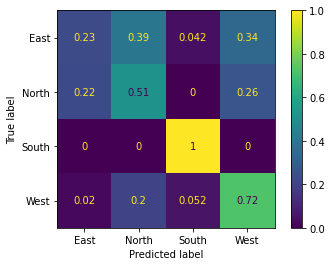

In [1260]:
plot_confusion_matrix(model2, X_test, y_test, normalize='true')

In [1261]:
algo3 = RandomForestClassifier(criterion='gini', max_depth=5, min_samples_split=0.01)
model3 = algo3.fit(X_train,y_train)

#Predictions
preds3 = model3.predict(X_test)

print(classification_report(y_test, preds3))

              precision    recall  f1-score   support

        East       0.54      0.22      0.31      4524
       North       0.40      0.54      0.46      4036
       South       0.90      1.00      0.95      4982
        West       0.65      0.73      0.68      6453

    accuracy                           0.64     19995
   macro avg       0.62      0.62      0.60     19995
weighted avg       0.64      0.64      0.62     19995



In [1262]:
round(cross_val_score(model3, X,y, cv=5, scoring='accuracy').mean(), 2)

0.64

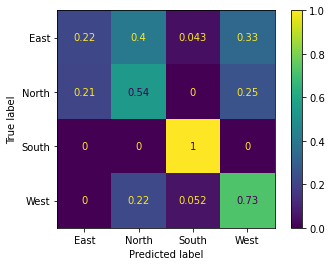

In [1263]:
plot_confusion_matrix(model3, X_test, y_test, normalize='true')

In both cases accuracy is near 0.64 and recall, precision are similar, but GradientBoosting definitely took more time. 0.64 is not satisfactory value of accuracy it should be over 0.75 for a succesfull model.

### Age discreditzation

Age can be discretized to create a more general model, which will have better results. It can be done in many ways - for example by dividing into equal-length bins or by generations. These two approaches will be considered now.

In [1266]:
# discretize age in 20 bins
X['age_bins'] = pd.cut(x=X['age'], bins=20).cat.codes
X_agebins = X.drop(['age'], axis='columns')
X = X.drop(['age_bins'], axis='columns')

In [1267]:
#Train/Test Split
X_train_dage, X_test_dage, y_train_dage, y_test_dage = train_test_split(X_agebins, y, test_size = 0.25, random_state = 123)

#Modeling
algo_dage = DecisionTreeClassifier(max_depth=3)
model_dage = algo_dage.fit(X_train_dage,y_train_dage)

#Predictions
preds_dage = model_dage.predict(X_test_dage)

In [1268]:
print(classification_report(y_test_dage, preds_dage))

              precision    recall  f1-score   support

        East       0.53      0.11      0.18      4524
       North       0.41      0.67      0.51      4036
       South       0.91      0.99      0.95      4982
        West       0.65      0.70      0.67      6453

    accuracy                           0.63     19995
   macro avg       0.62      0.62      0.58     19995
weighted avg       0.64      0.63      0.60     19995



THe values are similar to the ones without discretization. SOme tested models are shown in table at 2.1.8 paragraph.

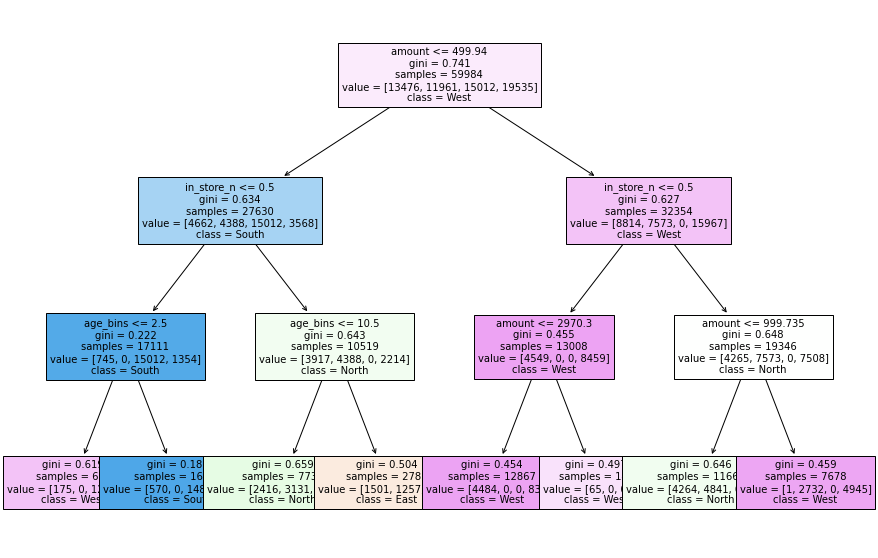

In [1355]:
fig = plt.figure(figsize=(15,10))
tree_dage = plot_tree(model_dage, feature_names=X_agebins.columns,class_names=['East', 'North', 'South', 'West'], max_depth=5, filled=True, fontsize=10)

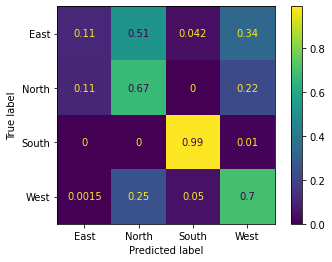

In [1270]:
plot_confusion_matrix(model_dage, X_test_dage, y_test_dage, normalize='true')

Here East is even harder to obtain - the North is favored. THe SOuth and the West are on similar levels as the last time.

In [1271]:
pd.Series(model_dage.feature_importances_, index = X_agebins.columns)

items         0.000000
amount        0.459523
in_store_n    0.500777
age_bins      0.039700
dtype: float64

Age seems to have smaller output now, as it has been divided into bins. Now in_store has much bigger relationship with region.

### Generations

Second way - dividing into generations.

In [1272]:
X_generations = X_generations.drop(['in_store', 'generation', 'age'], axis='columns')

In [1273]:
#Train/Test Split
X_train_gen, X_test_gen, y_train_gen, y_test_gen = train_test_split(X_generations, y, test_size = 0.25, random_state = 123)

#Modeling (Classification)
algo_gen = DecisionTreeClassifier(max_depth=3)
model_gen = algo_gen.fit(X_train_gen,y_train_gen)

#Predictions
preds_gen = model_gen.predict(X_test_gen)

In [1274]:
print(classification_report(y_test_gen, preds_gen))

              precision    recall  f1-score   support

        East       0.54      0.10      0.17      4524
       North       0.41      0.68      0.51      4036
       South       0.88      1.00      0.94      4982
        West       0.65      0.68      0.67      6453

    accuracy                           0.63     19995
   macro avg       0.62      0.62      0.57     19995
weighted avg       0.63      0.63      0.59     19995



Again the numbers in report are similar to both previous models.

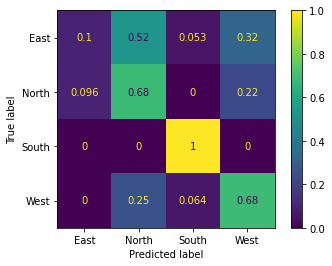

In [1275]:
plot_confusion_matrix(model_gen, X_test_gen, y_test_gen, normalize='true')

The Noth true prediction has decreased, but all three other region are doing better as in bins division.

### Discretization of amout

The following part will be discretizing amount and investigateing it's relationship with region,

In [1276]:
X['amount_bins'] = pd.cut(x=X['amount'], bins=10).cat.codes
X_damount = X.drop(['amount'], axis='columns')
X = X.drop(['amount_bins'], axis='columns')

In [1277]:
#Train/Test Split
X_train_damount, X_test_damount, y_train_damount, y_test_damount = train_test_split(X_damount, y, test_size = 0.3, random_state = 123)

#Modeling
algo_damount = RandomForestClassifier(max_depth=4)
model_damount = algo_damount.fit(X_train_damount, y_train_damount)

#Predictions
preds_damount = model_damount.predict(X_test_damount)

In [1278]:
print(classification_report(y_test_damount, preds_damount))

              precision    recall  f1-score   support

        East       0.54      0.22      0.31      5391
       North       0.40      0.48      0.44      4838
       South       0.88      1.00      0.94      5979
        West       0.62      0.74      0.68      7786

    accuracy                           0.63     23994
   macro avg       0.61      0.61      0.59     23994
weighted avg       0.62      0.63      0.61     23994



Again number are as the previous one, nothing surprising.

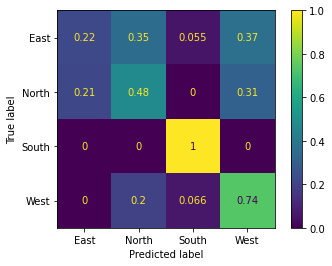

In [1279]:
plot_confusion_matrix(model_damount, X_test_damount, y_test_damount, normalize='true')

THe West is doing the best in this model, but East and North are not that high. TRied to use parameter class_weight={'North':7, 'South':1, 'East':7, 'West':5}, but it only transfers true predictions to another region  at the expense of others.

In [1280]:
pd.Series(model_damount.feature_importances_, index = X_damount.columns)

age            0.159276
items          0.000429
in_store_n     0.426753
amount_bins    0.413543
dtype: float64

SLightly bigger age impact and in_store is smaller than it was in age discrete age part.

### Age and amount discretizatuon at once

Now it it time to compare models while both age and amount are dicrete. 

In [1282]:
X['age_bins'] = pd.cut(x=X['age'], bins=4).cat.codes
X['amount_bins'] = pd.cut(x=X['amount'], bins=30).cat.codes
X_amo_age = X.drop([age', 'amount'], axis='columns')
X = X.drop(['amount_bins', 'age_bins'], axis='columns')

SyntaxError: invalid syntax (<ipython-input-1282-f0d309e2e457>, line 3)

In [1283]:
#Train/Test Split
X_train_amoage, X_test_amoage, y_train_amoage, y_test_amoage = train_test_split(X_amo_age, y, test_size = 0.25, random_state = 123)

#Modeling (Classification)
algo_amoage = RandomForestClassifier(max_depth=3)
model_amoage = algo_amoage.fit(X_train_amoage, y_train_amoage)

#Predictions
preds_amoage = model_amoage.predict(X_test_amoage)

In [1284]:
print(classification_report(y_test_amoage, preds_amoage))

              precision    recall  f1-score   support

        East       0.58      0.07      0.13      4524
       North       0.41      0.72      0.53      4036
       South       0.88      1.00      0.94      4982
        West       0.65      0.68      0.67      6453

    accuracy                           0.63     19995
   macro avg       0.63      0.62      0.56     19995
weighted avg       0.64      0.63      0.58     19995



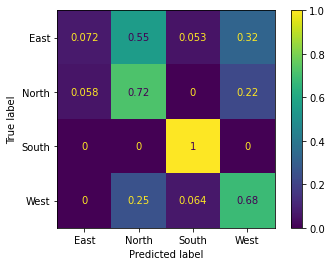

In [1285]:
plot_confusion_matrix(model_amoage, X_test_amoage, y_test_amoage, normalize='true')

In [1286]:
pd.Series(model_amoage.feature_importances_, index = X_amo_age.columns)

items          0.000180
in_store_n     0.387597
age_bins       0.107257
amount_bins    0.504967
dtype: float64

As it turned out age bins do not affect the model, but changes in amount bins can easily influence it.

### Performance table

Here are some of the models I tried. Turned out the worst to use was GradientBoosting, since in this cases it gives similar results as others classifiers, but it is much more time-consuming.

model | parameters | hyperparameters | performance
------|:------------:|:------------------:|------------
DecisionTreeClassifier |age,items,amount,in_store| - | Accuracy=0.56 Precision=0.55 Recall=0.55
RandomForestClassifier|age,items,amount,in_store, cv=5| - | Accuracy=0.64
DecisionTreeClassifier |age,items,amount,in_store|  max_depth=7, min_samples_split=0.01 | Accuracy=0.64 Precision=0.62 Recall=0.62
-|-|-|-
**Discretized age**|-|-|-
DecisionTreeClassifier |age,items,amount,in_store| - | Accuracy=0.56 Precision=0.55 Recall=0.55
DecisionTreeClassifier |age,items,amount,in_store| max_depth=4  | Accuracy=0.64 Precision=0.62 Recall=0.62
RandomForestClassifier |age,items,amount,in_store| max_depth=3 | Accuracy=0.63 Precision=0.62 Recall=0.62
-|-|-|-
**Generations**|-|-|-
DecisionTreeClassifier |age,items,amount,in_store| - | Accuracy=0.56 Precision=0.55 Recall=0.55
RandomForestClassifier |age,items,amount,in_store| max_depth=4  | Accuracy=0.64 Precision=0.62 Recall=0.62
GradientBoosting |age,items,amount,in_store| max_depth=3 | Accuracy=0.64 Precision=0.62 Recall=0.62
-|-|-|-
**Discretized amount**|-|-|-
DecisionTreeClassifier |age,items,amount,in_store| - | Accuracy=0.59 Precision=0.57 Recall=0.58
RandomForestClassifier |age,items,amount,in_store| max_depth=4  | Accuracy=0.63 Precision=0.62 Recall=0.1
GradientBoosting |age,items,amount,in_store| max_depth=3 | Accuracy=0.63 Precision=0.61 Recall=0.61
-|-|-|-
**Discretized amount and age**|-|-|-
DecisionTreeClassifier |age=4bins,items,amount=100bins,in_store| - | Accuracy=0.59 Precision=0.57 Recall=0.58
DecisionTreeClassifier |age=4bins,items,amount=30bins,in_store| - | Accuracy=0.63 Precision=0.61 Recall=0.61
GradientBoosting |age=4bins,items,amount=30bins,in_store| max_depth=4 | Accuracy=0.63 Precision=0.61 Recall=0.61

## Age prediction

### All regions

#### Generations

Searching for models based on age discretized on generations to asses age prediction

#####  classification tree 

In [1288]:
my_features = X_generations[['in_store_n', 'items', 'amount']].copy()
my_dependent = data1['generation']

In [1289]:
my_features['region'] = data['region'].copy()
my_features.head()

,in_store_n,items,amount,region
0,0,4,281.03,2
1,0,2,219.51,2
2,1,3,1525.70,4
3,1,3,715.25,3
4,1,4,1937.50,1


In [1290]:
#Train/Test Split
X_train_dep_age, X_test_dep_age, y_train_dep_age, y_test_dep_age = train_test_split(my_features, my_dependent, test_size = 0.25, random_state = 123)
#Modeling
algo_dep_age = DecisionTreeClassifier(max_depth=7)
model_dep_age = algo_dep_age.fit(X_train_dep_age,y_train_dep_age)
#Predictions
preds_dep_age = model_dep_age.predict(X_test_dep_age)

In [1291]:
print(classification_report(y_test_dep_age, preds_dep_age))

              precision    recall  f1-score   support

   Boomers I       0.07      0.00      0.00      1539
  Boomers II       0.17      0.00      0.00      2549
       Gen X       0.31      0.51      0.39      6857
       Gen Z       0.31      0.00      0.01      1517
 Millennials       0.39      0.52      0.45      6678
    Post War       0.00      0.00      0.00       855

    accuracy                           0.35     19995
   macro avg       0.21      0.17      0.14     19995
weighted avg       0.29      0.35      0.28     19995



The accuracy, precision and recall are not satysfying to accept the model.
Yet another time: GradientBoosting was very time-consuming

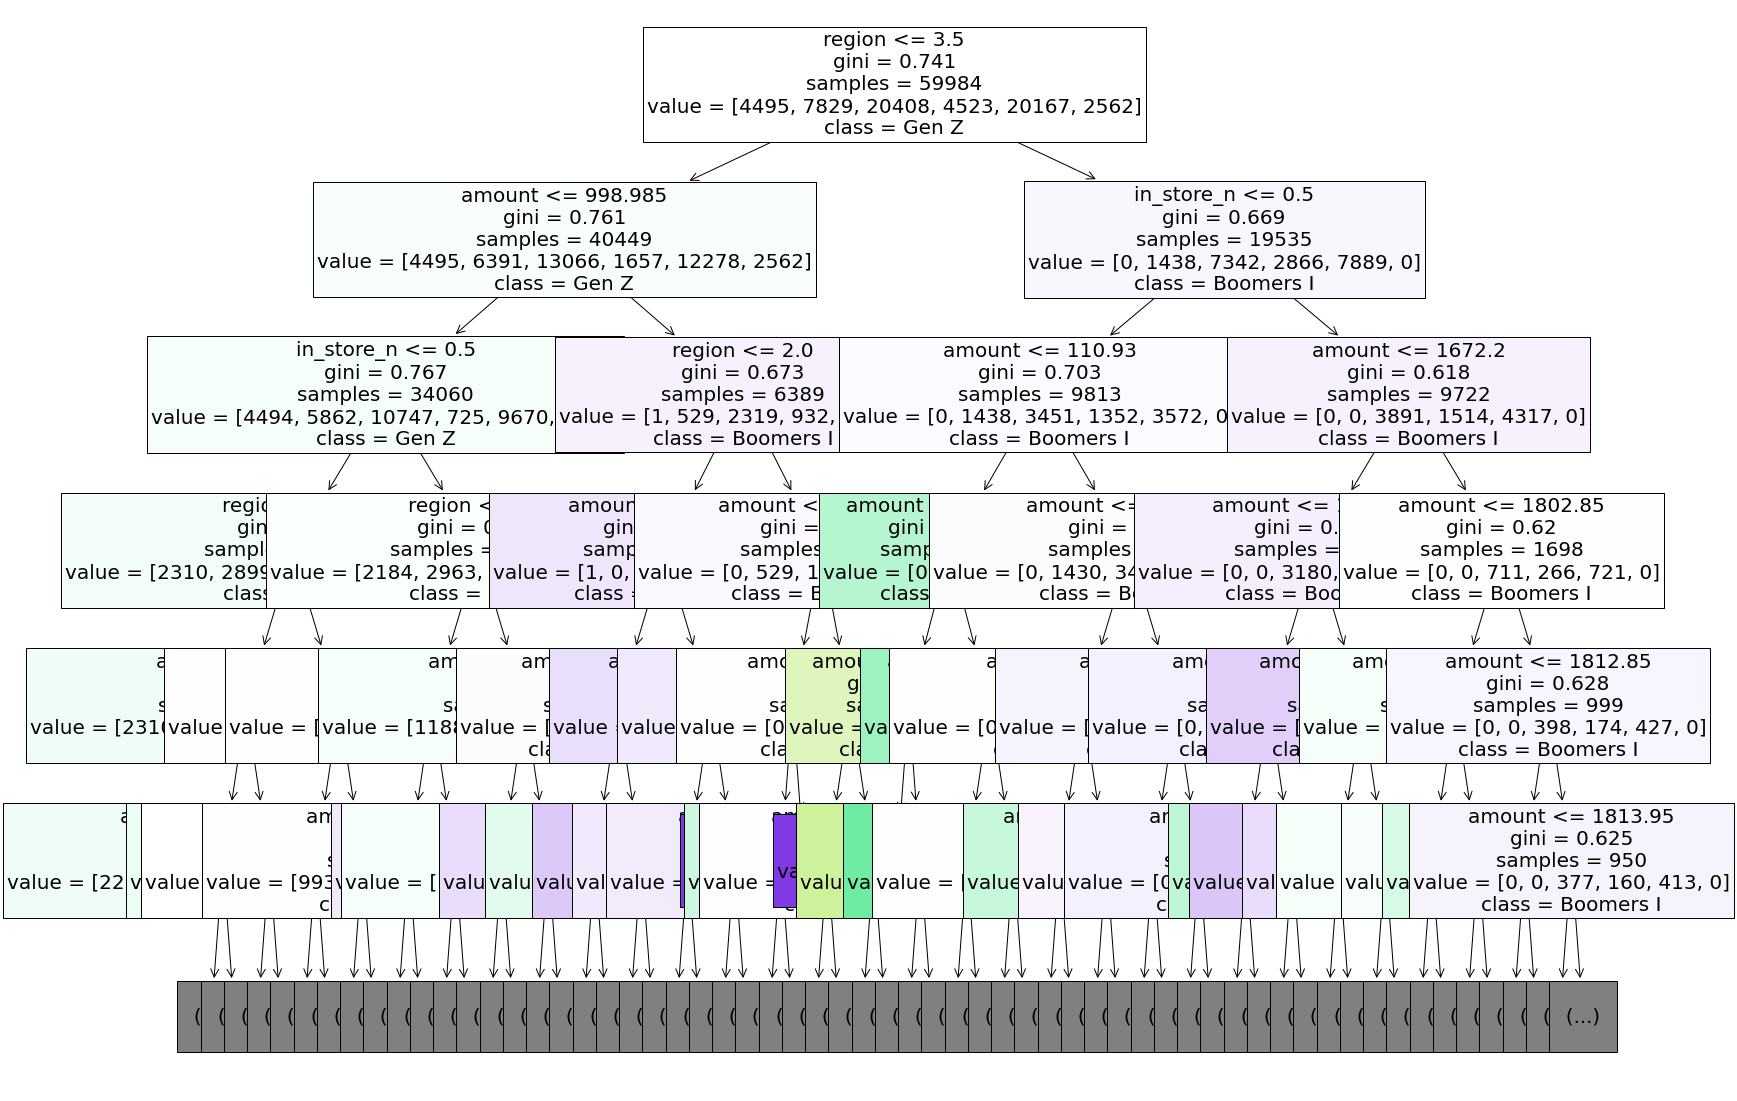

In [1292]:
fig_dep_age = plt.figure(figsize=(25,20))
tree_dep_age = plot_tree(model_dep_age, feature_names=my_features.columns, class_names=list(map(str, my_dependent.unique())), max_depth=5, filled=True, fontsize=20)

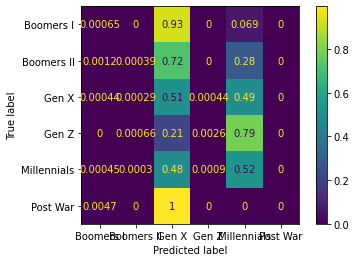

In [1293]:
plot_confusion_matrix(model_dep_age, X_test_dep_age, y_test_dep_age, normalize='true')

It is visible, that model favores Gen X  and MIllenials and does poor job predicting other ages.

In [1294]:
pd.Series(model_dep_age.feature_importances_, index = my_features.columns)

in_store_n    0.248807
items         0.013617
amount        0.277766
region        0.459810
dtype: float64

THe most important factor is region, then place of purchase and amount.

#### Distretized age and amount

Next the discretization of age in 4 bins and amount in e.g. 50 bins.

In [1295]:
X['age_bins'] = pd.cut(x=X['age'], bins=4).cat.codes
X['amount_bins'] = pd.cut(x=X['amount'], bins=50).cat.codes
X_age_pred = X.drop(['age', 'amount'], axis='columns')
X = X.drop(['amount_bins', 'age_bins'], axis='columns')

In [1296]:
X_age_pred['region'] = data['region'].copy()
y_age_pred = X_age_pred['age_bins']
X_age_pred = X_age_pred.drop(['age_bins'], axis='columns')

In [1297]:
#Train/Test Split
X_train_age_pred, X_test_age_pred, y_train_age_pred, y_test_age_pred = train_test_split(X_age_pred, y_age_pred, test_size = 0.25, random_state = 123)

#Modeling (Classification)
algo_age_pred = DecisionTreeClassifier(max_depth=6, class_weight={0:7, 1:6.8, 2:7, 3:8})
model_age_pred = algo_age_pred.fit(X_train_age_pred, y_train_age_pred)

#Predictions
preds_age_pred = model_age_pred.predict(X_test_age_pred)

In [1298]:
print(classification_report(y_test_age_pred, preds_age_pred))

              precision    recall  f1-score   support

           0       0.38      0.34      0.36      5590
           1       0.40      0.47      0.43      7468
           2       0.31      0.09      0.14      4918
           3       0.29      0.72      0.41      2019

    accuracy                           0.36     19995
   macro avg       0.35      0.40      0.34     19995
weighted avg       0.36      0.36      0.34     19995



Ain the model isn't good, even after applying class_weight hyperparameter.

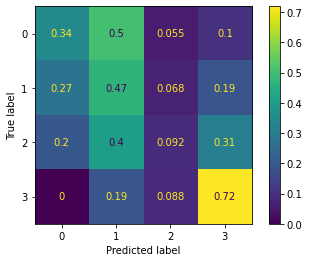

In [1299]:
plot_confusion_matrix(model_age_pred, X_test_age_pred, y_test_age_pred, normalize='true')

The model is only useful for predicting label 3 - by changing class_weight it can be changed so the algorithm will favor another class.

In [1300]:
pd.Series(model_age_pred.feature_importances_, index = X_age_pred.columns)

items          0.012118
in_store_n     0.214042
amount_bins    0.297526
region         0.476314
dtype: float64

In [1356]:
# Evaluating 3 models 
algos_Class_age = []
algos_Class_age.append(('Random Forest Classifier', RandomForestClassifier(max_depth=7)))
algos_Class_age.append(('Decision Tree Classifier', DecisionTreeClassifier(max_depth=7)))
algos_Class_age.append(('Gradient Boosting Classifier', GradientBoostingClassifier(max_depth=7)))

#classification
results_age = []
names_age = []
for name, a_model in algos_Class:
    result_age = cross_val_score(a_model, X_age_pred, y_age_pred, cv=3, scoring='accuracy')
    names_age.append(name)
    results_age.append(result_age)

# printing results
for i in range(len(names_age)):
    print(names_age[i],round(results_age[i].mean(), 2))

Random Forest Classifier 0.37
Decision Tree Classifier 0.37
Gradient Boosting Classifier 0.36


All the classifiers achieve similar accuracies, but given time of execution and result - it is better to choose either Random Forest of Decision Tree.

### Division into regions

Following section will be about modelling age in regions separately.

In [1302]:
X['age_bins'] = pd.cut(x=X['age'], bins=3).cat.codes
X['amount_bins'] = pd.cut(x=X['amount'], bins=45).cat.codes
X_amo_age = X.drop(['age', 'amount'], axis='columns')
X = X.drop(['amount_bins', 'age_bins'], axis='columns')

In [1303]:
X_amo_age['region'] = data['region']
X_amo_age.head()

,items,in_store_n,age_bins,amount_bins,region
0,4,0,0,4,2
1,2,0,0,3,2
2,3,1,1,22,4
3,3,1,1,10,3
4,4,1,0,29,1


In [1304]:
North = X_amo_age[X_amo_age['region']==1].copy()
South = X_amo_age[X_amo_age['region']==2].copy()
East = X_amo_age[X_amo_age['region']==3].copy()
West = X_amo_age[X_amo_age['region']==4].copy()

#### North

In [1305]:
n_age_features = North[['in_store_n', 'items', 'amount_bins']].copy()
n_age_dependent = North['age_bins']

In [1306]:
#Train/Test Split
X_train_n_age, X_test_n_age, y_train_n_age, y_test_n_age = train_test_split(n_age_features, n_age_dependent, test_size = 0.25, random_state = 123)
#Modeling
algo_n_age = DecisionTreeClassifier(max_depth=6)
model_n_age = algo_n_age.fit(X_train_n_age, y_train_n_age)
#Predictions
preds_n_age = model_n_age.predict(X_test_n_age)

In [1307]:
print(classification_report(y_test_n_age, preds_n_age))

              precision    recall  f1-score   support

           0       0.53      0.48      0.51      1800
           1       0.44      0.61      0.51      1706
           2       0.00      0.00      0.00       494

    accuracy                           0.48      4000
   macro avg       0.32      0.37      0.34      4000
weighted avg       0.43      0.48      0.45      4000



The results of raport are not enough to use this model in real cases.

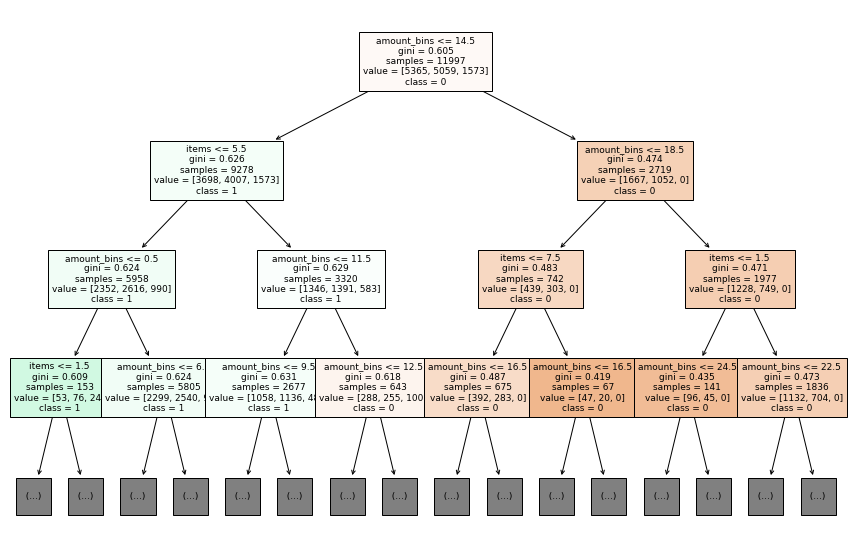

In [1308]:
fig_n_age = plt.figure(figsize=(15,10))
tree_n_age = plot_tree(model_n_age, feature_names=n_age_features.columns, class_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], max_depth=3, filled=True, fontsize=9)

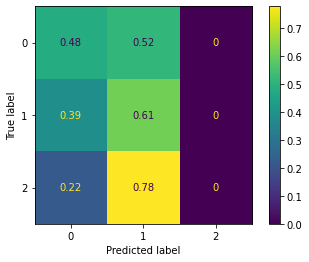

In [1309]:
plot_confusion_matrix(model_n_age, X_test_n_age, y_test_n_age, normalize='true')

As we can see modell does not predict any records in label 2, and fovors label 1 instead.

In [1310]:
pd.Series(model_n_age.feature_importances_, index = n_age_features.columns)

in_store_n     0.00000
items          0.10008
amount_bins    0.89992
dtype: float64

Almost only amount variable is important to model in the North.

#### South

In [1311]:
X['age_bins'] = pd.cut(x=X['age'], bins=3).cat.codes
X['amount_bins'] = pd.cut(x=X['amount'], bins=45).cat.codes
X_amo_age = X.drop(['age', 'amount'], axis='columns')
X = X.drop(['amount_bins', 'age_bins'], axis='columns')

In [1312]:
s_age_features = South[['in_store_n', 'items', 'amount_bins']].copy()
s_age_dependent = South['age_bins']

In [1315]:
#Train/Test Split
X_train_s_age, X_test_s_age, y_train_s_age, y_test_s_age = train_test_split(s_age_features, s_age_dependent, test_size = 0.25, random_state = 123)
#Modeling (Classification)
algo_s_age = DecisionTreeClassifier(max_depth=3)
model_s_age = algo_s_age.fit(X_train_s_age, y_train_s_age)
#Predictions
preds_s_age = model_s_age.predict(X_test_s_age)

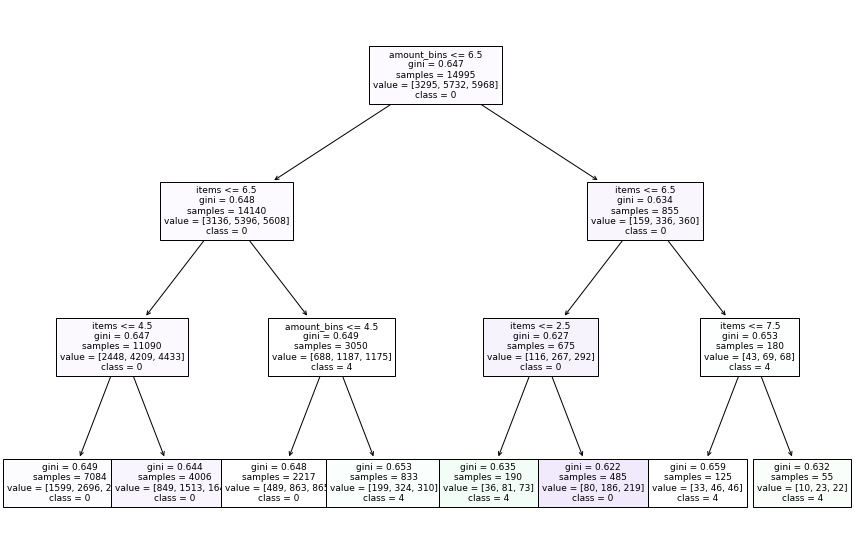

In [1316]:
fig_s_age = plt.figure(figsize=(15,10))
tree_s_age = plot_tree(model_s_age, feature_names=s_age_features.columns, class_names=lis, max_depth=3, filled=True, fontsize=9)

In [1317]:
print(classification_report(y_test_s_age, preds_s_age))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1065
           1       0.39      0.08      0.14      1949
           2       0.40      0.91      0.55      1985

    accuracy                           0.40      4999
   macro avg       0.26      0.33      0.23      4999
weighted avg       0.31      0.40      0.27      4999



Here results of accuracy and others are eve worse than in the North.

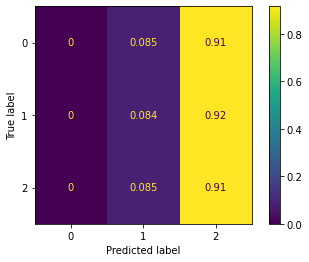

In [1318]:
plot_confusion_matrix(model_s_age, X_test_s_age, y_test_s_age, normalize='true')

THis time model does not predict any label 0 and only a per mille of label 1.

In [1319]:
pd.Series(model_s_age.feature_importances_, index = s_age_features.columns)

in_store_n     0.000000
items          0.686857
amount_bins    0.313143
dtype: float64

In this region items variable is the most impactful (2/3) and amount has also influence (1/3).

With hyperparameter  class_weight={0:12, 1:7.1, 2:6.603} precision and recall were better, but accuracy was worse.

#### East

Now is the time to consider age in the East.

In [1320]:
e_age_features = East[['in_store_n', 'items', 'amount_bins']].copy()
e_age_dependent = East['age_bins']

In [1323]:
#Train/Test Split
X_train_e_age, X_test_e_age, y_train_e_age, y_test_e_age = train_test_split(e_age_features, e_age_dependent, test_size = 0.25, random_state = 123)
#Modeling (Classification)
algo_e_age = DecisionTreeClassifier(max_depth=3)
model_e_age = algo_e_age.fit(X_train_e_age, y_train_e_age)
#Predictions
preds_e_age = model_e_age.predict(X_test_e_age)

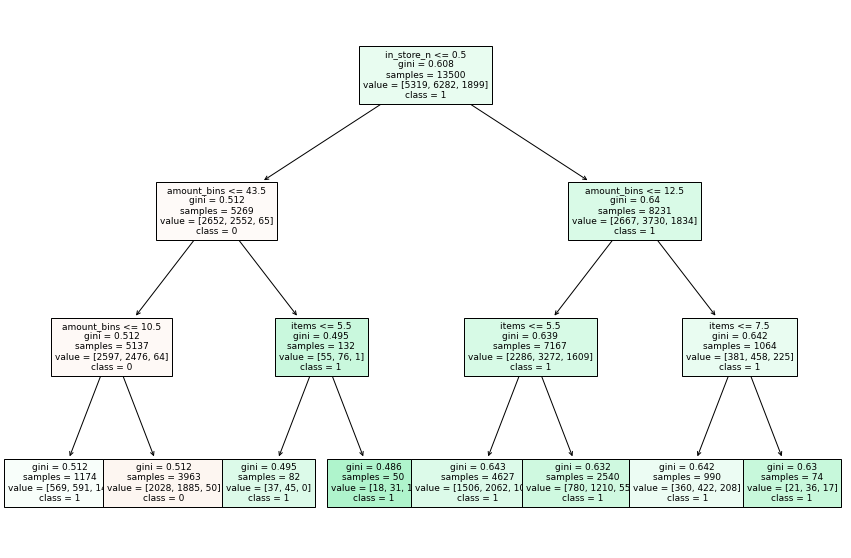

In [1324]:
fig_e_age = plt.figure(figsize=(15,10))
tree_e_age = plot_tree(model_e_age, feature_names=n_age_features.columns, class_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], max_depth=3, filled=True, fontsize=9)

In [1325]:
print(classification_report(y_test_e_age, preds_e_age))

              precision    recall  f1-score   support

           0       0.50      0.38      0.43      1762
           1       0.46      0.69      0.55      2094
           2       0.00      0.00      0.00       644

    accuracy                           0.47      4500
   macro avg       0.32      0.36      0.33      4500
weighted avg       0.41      0.47      0.43      4500



Values in confusion matrix are closer to the North region than to the South.

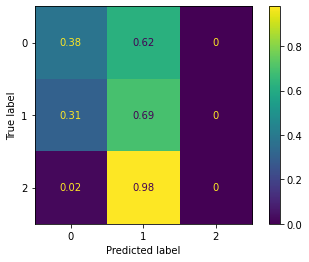

In [1326]:
plot_confusion_matrix(model_e_age, X_test_e_age, y_test_e_age, normalize='true')

One again model prefers one of the labels - this time 1st label and 2nd does not have any given predictions

In [1327]:
pd.Series(model_e_age.feature_importances_, index = e_age_features.columns)

in_store_n     0.964272
items          0.013557
amount_bins    0.022170
dtype: float64

Here place of purchase is the most important variable.

#### West

Lastly the West region regarding age,

In [1328]:
w_age_features = West[['in_store_n', 'items', 'amount_bins']].copy()
w_age_dependent = West['age_bins']

In [1331]:
#Train/Test Split
X_train_w_age, X_test_w_age, y_train_w_age, y_test_w_age = train_test_split(w_age_features, w_age_dependent, test_size = 0.25, random_state = 123)
#Modeling (Classification)
algo_w_age = DecisionTreeClassifier(max_depth=5)
model_w_age = algo_w_age.fit(X_train_w_age, y_train_w_age)
#Predictions
preds_w_age = model_w_age.predict(X_test_w_age)

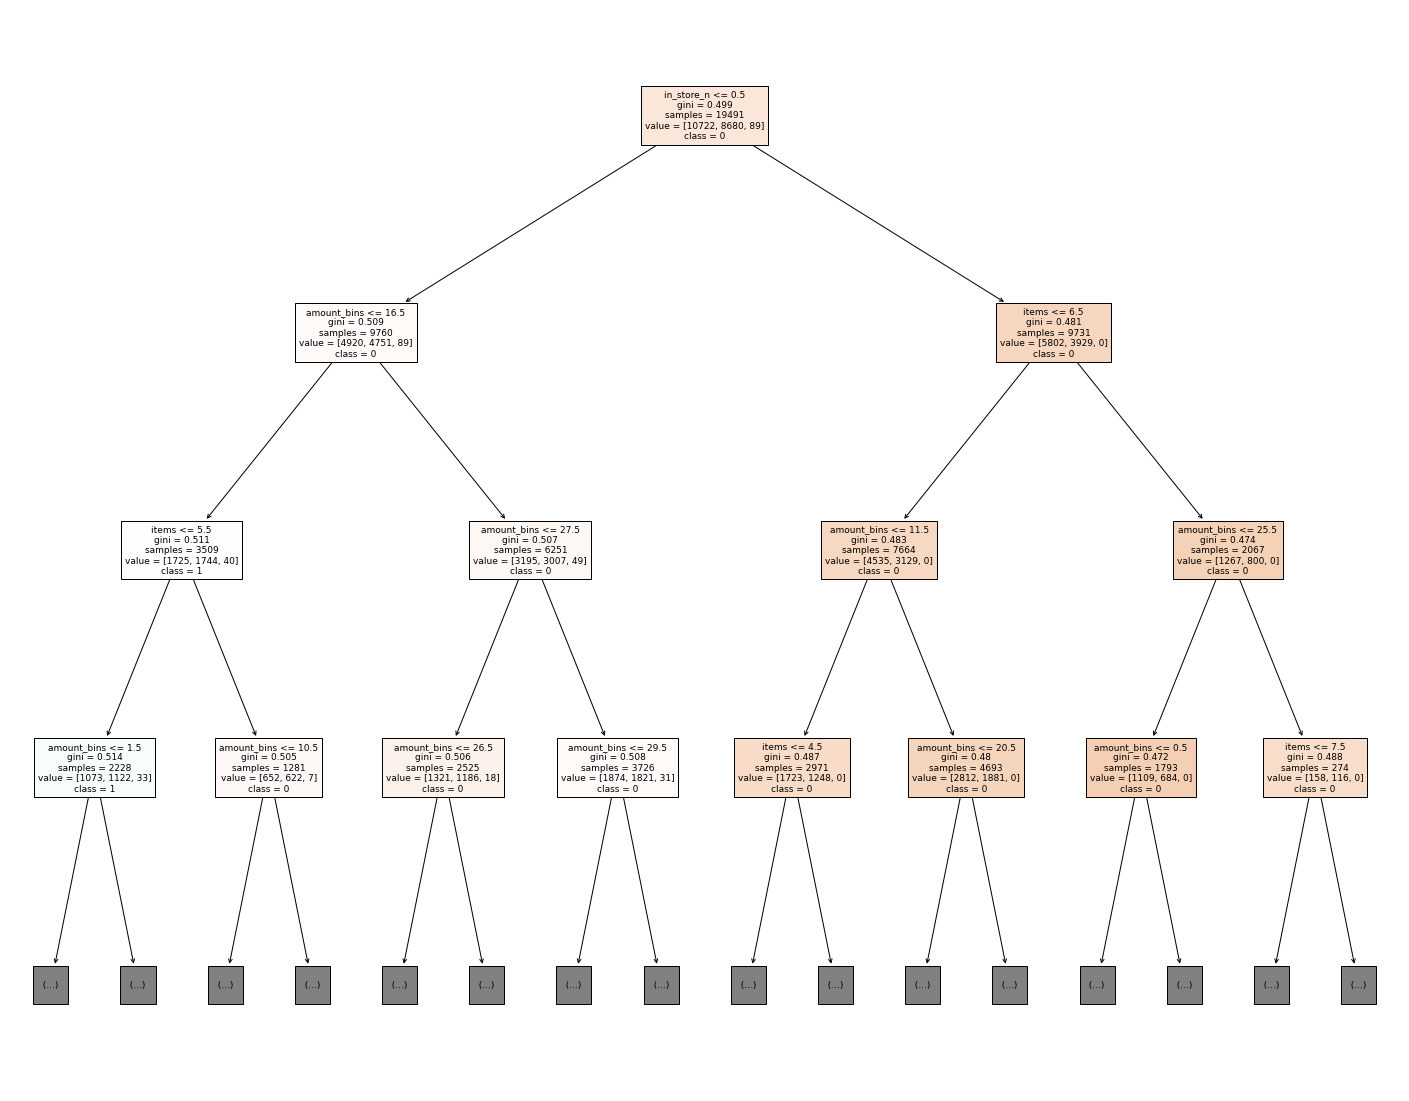

In [1332]:
fig_w_age = plt.figure(figsize=(25,20))
tree_w_age = plot_tree(model_w_age, feature_names=n_age_features.columns, class_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], max_depth=3, filled=True, fontsize=9)

In [1333]:
print(classification_report(y_test_n_age, preds_n_age))

              precision    recall  f1-score   support

           0       0.53      0.48      0.51      1800
           1       0.44      0.61      0.51      1706
           2       0.00      0.00      0.00       494

    accuracy                           0.48      4000
   macro avg       0.32      0.37      0.34      4000
weighted avg       0.43      0.48      0.45      4000



Values of report are similar to the East and th North region.

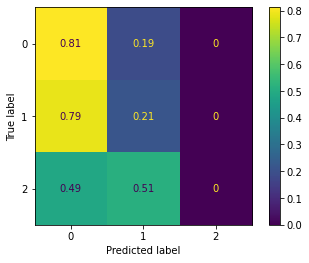

In [1334]:
plot_confusion_matrix(model_w_age, X_test_w_age, y_test_w_age, normalize='true')

As in every confusion matrix before there are no predictions for one label (3rd this time). Other values are pretty chaotic and I wouldn't say they predict well, it is rather random.

In [1335]:
pd.Series(model_w_age.feature_importances_, index = w_age_features.columns)

in_store_n     0.704429
items          0.093157
amount_bins    0.202414
dtype: float64

Here also in_store variable is the most influential, but amount has to be taken into considerations as well.

### Prediction performance table

model | parameters | hyperparameters | performance
------|:------------:|:------------------:|------------
Generations|-|-|-
DecisionTreeClassifier|in_store, items, amount, region|max_depth=7|Acuuracy=0.35 Precision=0.21 Recall=0.17
RandomForestClassifier|in_store, items, amount, region|max_depth=10|Acuuracy=0.35 Precision=0.24 Recall=0.17
GradientBoostingeClassifier|in_store, items, amount, region|max_depth=10|Acuuracy=0.33 Precision=0.19 Recall=0.17
GradientBoostingClassifier|in_store, items, amount, region|max_depth=7|Acuuracy=0.34 Precision=0.22 Recall=0.18
-|-|-|-
Discretized age
DecisionTreeClassifier|age_bins=6, amount_bins=20, region, items, in_store| max_depth=4, class_weight={0:7, 1:6.8, 2:7, 3:8}|Acurracy=0.24 Precision=0.16 Recall=0.19
DecisionTreeClassifier|age_bins=4, amount_bins=50, region, items, in_store | max_depth=6, class_weight={0:7, 1:6.8, 2:7, 3:8}|Acurracy=0.36 Precision=0.31 Recall=0.40
RandomForestClassifier|age_bins=4, amount_bins=50, region, items,  in_store | max_depth=6, class_weight={0:7, 1:6.8, 2:7, 3:8}|Acurracy=0.37 Precision=0.35 Recall=0.40
GradientBoostingClassifier|age_bins=4, amount_bins=50, region, items,  in_store | max_depth=6|Acurracy=0.37 Precision=0.35 Recall=0.40
-|-|-|-
North,Discretized age|-|-|-
DecisionTreeClassifier|age_bins=3, amount_bins=45, items, in_store| max_depth=6, class_weight={0:4.2, 1:4.1, 2:10.3}|Acurracy=0.39 Precision=0.39 Recall=0.40
DecisionTreeClassifier|age_bins=3, amount_bins=45, items, in_store| max_depth=6|Acurracy=0.48 Precision=0.32 Recall=0.37
RandomForestClassifier|age_bins=3, amount_bins=45, items, in_store| max_depth=6|Acurracy=0.47 Precision=0.33 Recall=0.36
GradientBoostingClassifier|age_bins=3, amount_bins=45, region, items | max_depth=6|Acurracy=0.46 Precision=0.351 Recall=0.45
-|-|-|-
South,Discretized age|-|-|-
DecisionTreeClassifier|age_bins=3, amount_bins=45, items, in_store| max_depth=3|Acurracy=0.40 Precision=0.26 Recall=0.33
RandomForestClassifier|age_bins=3, amount_bins=20, items, in_store| max_depth=3|Acurracy=0.40 Precision=0.26 Recall=0.33
GradientBoostingClassifier|age_bins=3, amount_bins=45, region, items | max_depth=3|Acurracy=0.39 Precision=0.26 Recall=0.33
-|-|-|-
East,Discretized age|-|-|-
DecisionTreeClassifier|age_bins=3, amount_bins=45, items, in_store| max_depth=3|Acurracy=0.47 Precision=0.32 Recall=0.36
RandomForestClassifier|age_bins=3, amount_bins=45, items, in_store| max_depth=3|Acurracy=0.47 Precision=0.32 Recall=0.35
GradientBoostingClassifier|age_bins=3, amount_bins=45, region, items | max_depth=3|Acurracy=0.46 Precision=0.31 Recall=0.35
-|-|-|-
West,Discretized age|-|-|-
DecisionTreeClassifier|age_bins=3, amount_bins=45, items, in_store| max_depth=3|Acurracy=0.47 Precision=0.33 Recall=0.36
RandomForestClassifier|age_bins=3, amount_bins=45, items, in_store| max_depth=3|Acurracy=0.47 Precision=0.33 Recall=0.36
GradientBoostingClassifier|age_bins=3, amount_bins=45, region, items | max_depth=5|Acurracy=0.47 Precision=0.33 Recall=0.36

## Type of transaction prediction

### Classifiation tree 

In [1336]:
X['age_bins'] = pd.cut(x=X['age'], bins=5).cat.codes
X['amount_bins'] = pd.cut(x=X['amount'], bins=100).cat.codes
X_instore = X.drop(['age', 'amount'], axis='columns')
X = X.drop(['amount_bins', 'age_bins'], axis='columns')

In [1337]:
features_instore = X_instore[['age_bins', 'items', 'amount_bins']].copy()
dependent_instore = X_instore['in_store_n']
features_instore['region'] = data['region'].copy()

#Train/Test Split
X_train_instore, X_test_instore, y_train_instore, y_test_instore = train_test_split(features_instore, dependent_instore, test_size = 0.25, random_state = 123)
#Modeling
algo_instore = RandomForestClassifier(max_depth=6)
model_instore = algo_instore.fit(X_train_instore,y_train_instore)
#Predictions
preds_instore = model_instore.predict(X_test_instore)

In [1338]:
print(classification_report(y_test_instore, preds_instore))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86      9870
           1       0.81      1.00      0.89     10125

    accuracy                           0.88     19995
   macro avg       0.90      0.88      0.87     19995
weighted avg       0.90      0.88      0.87     19995



This variable is easy to predict given all other demographic data. It was such a nice surprise to get satysfying result right away. 

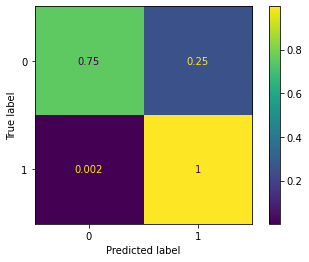

In [1339]:
plot_confusion_matrix(model_instore, X_test_instore, y_test_instore, normalize='true')

The confusion matrix shows quite good predictions of labels. Though 0.24 is still a lot, but given some cases (e.g. 1-cancer, 0-no cancer) it is better that way. Overall accuracy is pretty high 88%.

In [1360]:
 pd.Series(model_instore.feature_importances_, index = features_instore.columns)

age_bins       0.038216
items          0.000072
amount_bins    0.238460
region         0.723252
dtype: float64

The feature importance shows big influence from amount_bins, what confirms the EDA.

In [1364]:
round(cohen_kappa_score(y_test_instore, preds_instore), 2)

0.75

Cohen's Kappa value suggest **good** agrement of the two samples.

In [1341]:
# Cross validation
round(cross_val_score(DecisionTreeClassifier(max_depth=6), features_instore, dependent_instore, cv=3, scoring='accuracy').mean(), 2)

0.87

In [1342]:
# Evaluating 3 models 
algos_Class_instore = []
algos_Class_instore.append(('Random Forest Classifier', RandomForestClassifier(max_depth=6)))
algos_Class_instore.append(('Decision Tree Classifier', DecisionTreeClassifier(max_depth=6)))
algos_Class_instore.append(('Gradient Boosting Classifier', GradientBoostingClassifier(max_depth=6)))

#classification
results_instore = []
names_instore = []
for name, a_model in algos_Class_instore:
    result_instore = cross_val_score(a_model, features_instore, dependent_instore, cv=3, scoring='accuracy')
    names_instore.append(name)
    results_instore.append(result_instore)

# printing results
for i in range(len(names_instore)):
    print(names_instore[i],round(results_instore[i].mean(), 2))

Random Forest Classifier 0.87
Decision Tree Classifier 0.87
Gradient Boosting Classifier 0.87


### Prediction performance table

model | parameters | hyperparameters | performance
------|:------------:|:------------------:|------------
DecisionTreeClassifier|age_bins=4, amunt_bins=30|max_depth=6|Accuracy=0.88 Precision=0.89 Recall=0.88
DecisionTreeClassifier|age_bins=5, amunt_bins=100|max_depth=6|Accuracy=0.88 Precision=0.90 Recall=0.87
GradientBoostingClassifier|age_bins=5, amunt_bins=100|max_depth=4|Accuracy=0.88 Precision=0.90 Recall=0.88
RandomFOrestClassifier|age_bins=5, amunt_bins=100|max_depth=4|Accuracy=0.84 Precision=0.88 Recall=0.84

Very similar values in the table, it does not need much pruning to get good performance

## Amount prediction

### Classification tree 

Last part of predictions refers to amount.

In [1343]:
X['region'] = data['region'].copy()
X['age_bins'] = pd.cut(x=X['age'], bins=3).cat.codes
X['amount_bins'] = pd.cut(x=X['amount'], bins=10).cat.codes
amount_bins = pd.cut(x=X['amount'], bins=10)
X_amo = X.drop(['age', 'amount'], axis='columns')
X = X.drop(['amount_bins', 'age_bins'], axis='columns')

In [1344]:
X_amo1 = X_amo.copy()

In [1345]:
amo_features = X_amo1[['in_store_n', 'items', 'age_bins']].copy()
amo_dependent = X_amo1['amount_bins']

In [1346]:
#Train/Test Split
X_train_amo, X_test_amo, y_train_amo, y_test_amo = train_test_split(amo_features, amo_dependent, test_size = 0.25, random_state = 123)
#Modeling (Classification)
algo_amo = DecisionTreeClassifier(max_depth=5)
model_amo = algo_amo.fit(X_train_amo, y_train_amo)
#Predictions
preds_amo = model_amo.predict(X_test_amo)

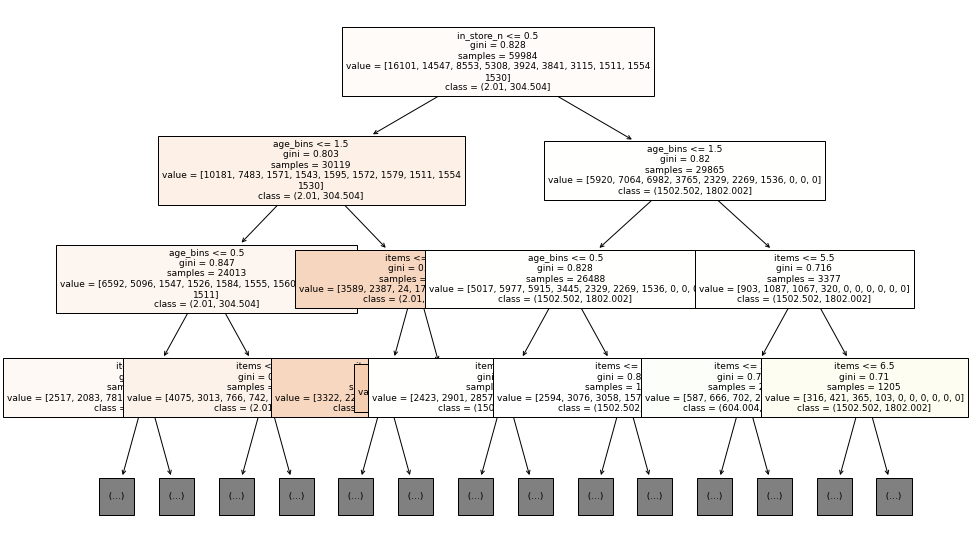

In [1347]:
fig_amo= plt.figure(figsize=(15,10))
tree_amo = plot_tree(model_amo, feature_names=amo_features.columns, max_depth=3, class_names=list(map(str, amount_bins.unique())), filled=True, fontsize=9)

In [1348]:
print(classification_report(y_test_amo, preds_amo))

              precision    recall  f1-score   support

           0       0.35      0.63      0.45      5452
           1       0.23      0.29      0.26      4737
           2       0.24      0.34      0.28      2906
           3       0.00      0.00      0.00      1843
           4       0.00      0.00      0.00      1260
           5       0.00      0.00      0.00      1310
           6       0.00      0.00      0.00      1012
           7       0.00      0.00      0.00       503
           8       0.00      0.00      0.00       492
           9       0.00      0.00      0.00       480

    accuracy                           0.29     19995
   macro avg       0.08      0.13      0.10     19995
weighted avg       0.18      0.29      0.22     19995



The accuracy is very low, as shown intable below (2.4.2) model could not reach higher values.

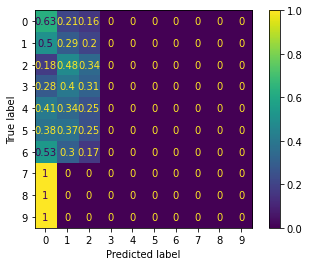

In [1349]:
plot_confusion_matrix(model_amo, X_test_amo, y_test_amo, normalize='true')

COnfusion matrix shows that only low amounts are predicted and nothing higher than 2nd label and it's the reason that model is unsuccesfull and can't be used in such way.

In [1350]:
pd.Series(model_amo.feature_importances_, index = amo_features.columns)

in_store_n    0.496367
items         0.008974
age_bins      0.494659
dtype: float64

Here also a major role plays age and place of purchase.

### Prediction performance table

model | parameters | hyperparameters | performance
------|:------------:|:------------------:|------------
DecisionTreeClassifier |age_bins=5, amount_bins=10| depth=10| Accuracy=0.29, Precision=0.08, Recall=0.13
DecisionTreeClassifier |age_bins=5, amount_bins=30| depth=5| Accuracy=0.1, Precision=0.03, Recall=0.04
DecisionTreeClassifier |Region2, age_bins=3, amount_bins=10| depth=5| Accuracy=0.6, Precision=0.3, Recall=0.5
RandomForestClassifier |age_bins=5, amount_bins=10| depth=10| Accuracy=0.29, Precision=0.08, Recall=0.13
GradientBoostingClassifier|age_bins=3, amount_bins=10, cv=5|depth=7| Accuracy=0.29 Precision=0.08 Recall=0.13

## Conclusion

HIpotesis: customers who shop in the store are older than customers who shop online and that older people spend more money on electronics than younger people


  *  Are there differences in the age of customers between regions? If so, can we predict the age of a customer in a region based on other demographic data?

There are some differences, mainly in ages of customers in the West and South. But I wasn't able to fit the right model to predict age in seperate regions and in the country, probably the data it to congruent.


  *  We need to investigate Martin’s hypothesis: Is there any correlation between age of a customer and if the transaction was made online or in the store? Do any other factors predict if a customer will buy online or in our stores?

People after 55yo more often buy online than in store so there is certain correlation between age and type of transaction, but in model creating it shows that age has almost zero impact on type of transaction. THe most important factor is region - as we can see there are no stationary transactions in the South and no online transactions in the North. Amount should be also included into consideration, but it has smaller impact on transaction type than region.

* What about classifying Where a transaction took place -can that be done successfully?

Yes, a model for prediction place of tranaction can easily be generated. It was in 2.3 Type od transaction prediction.

* What about items? Are these even in the tree? Why or why not?

Variable items first occurence in region prediction is on the 4th level, so it is not that important. It shows up earlier (2nd or 3rd level) in age prediction while dividing into regions. Item variable does not say much about other variables, since in correlation part it had almost 0 correlation soefficient, so it is independent variable.